# Business Case
### Customer Churn Analysis

#### Problem Statement:
- Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals. Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base. reventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

#### The aim of building and comparing several customer churn prediction models. 

# Importing Libraries and dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# create dataframe
churn = pd.read_csv("churn.csv")

In [3]:
#inspect the first five records
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Most of the columns are of object type the target variable is of object type

In [4]:
churn.shape

(7043, 21)

##### There are 7043 records and 21 columns

# Indentify the problem :  Classification

In [5]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Observation:

- There are 21 columns 
- Target column is classification
- supervised/ classification

# Exploratory Data Analysis and Data Cleaning

In [6]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

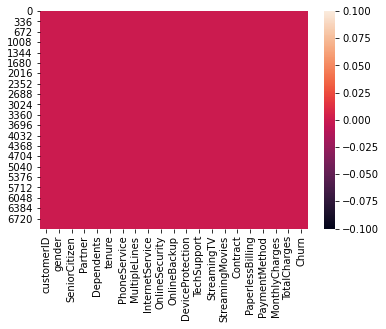

In [7]:
sns.heatmap(churn.isnull())

### There are no null values in the dataset

In [8]:
churn["customerID"].value_counts()

1173-NOEYG    1
6711-VTNRE    1
7823-JSOAG    1
9110-HSGTV    1
0980-FEXWF    1
             ..
5895-QSXOD    1
1775-KWJKQ    1
0002-ORFBO    1
8944-AILEF    1
3873-NFTGI    1
Name: customerID, Length: 7043, dtype: int64

#### The column customerID will not impact the prediction droping the column

In [9]:
churn = churn.drop("customerID", axis=1)

In [10]:
churn["TotalCharges"] = churn["TotalCharges"].str.strip()

In [11]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"])

In [12]:
for x in churn.columns:
    print(churn[x].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


# Identifying the categorical variables

In [13]:
obj = []
for x in churn.columns:
    if churn[x].dtypes == "object":
        obj.append(x)

In [14]:
obj

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Univariate Analysis

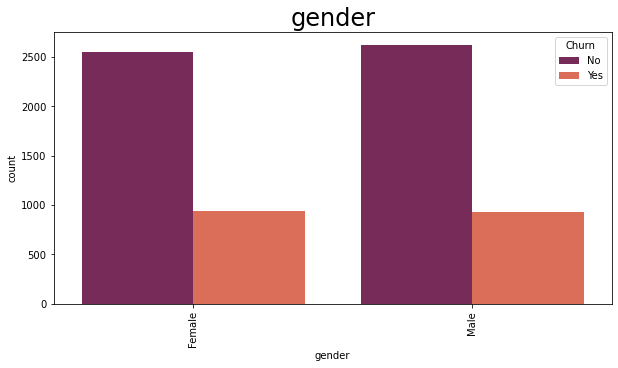

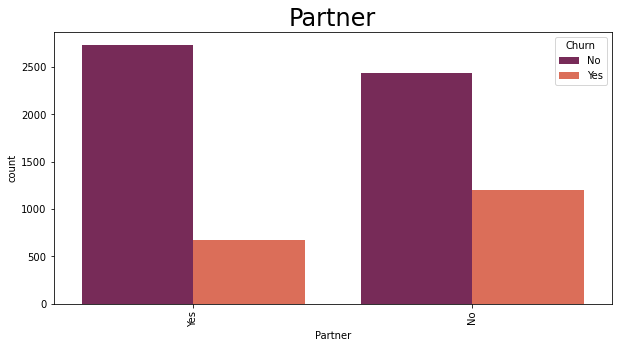

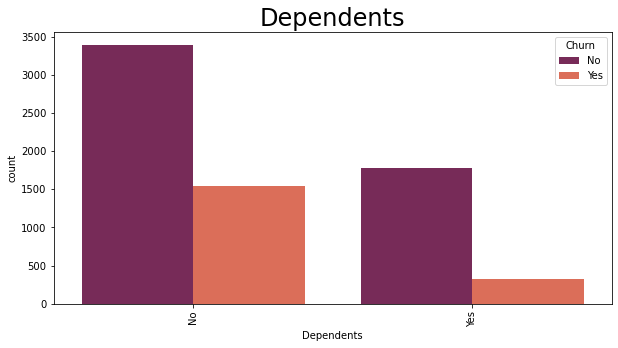

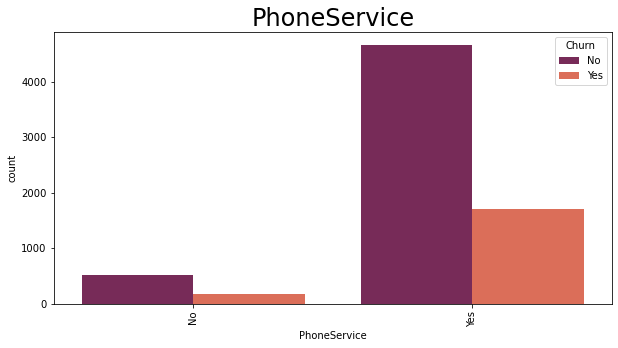

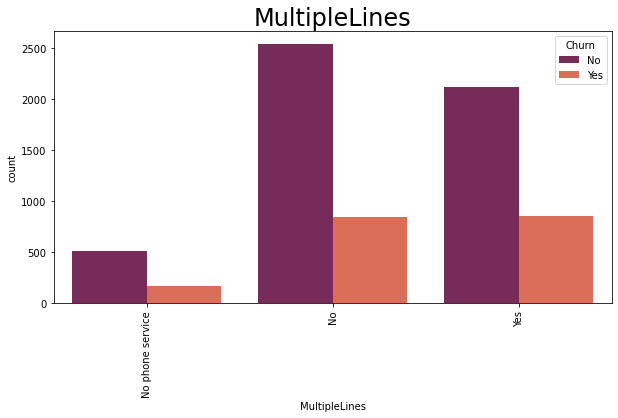

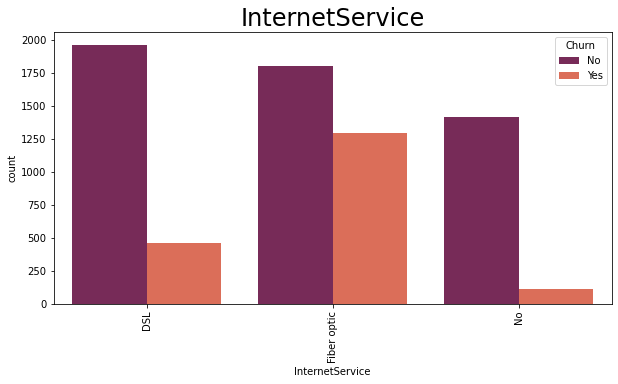

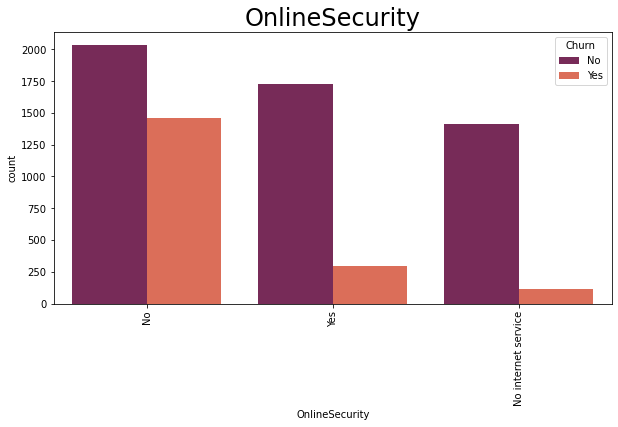

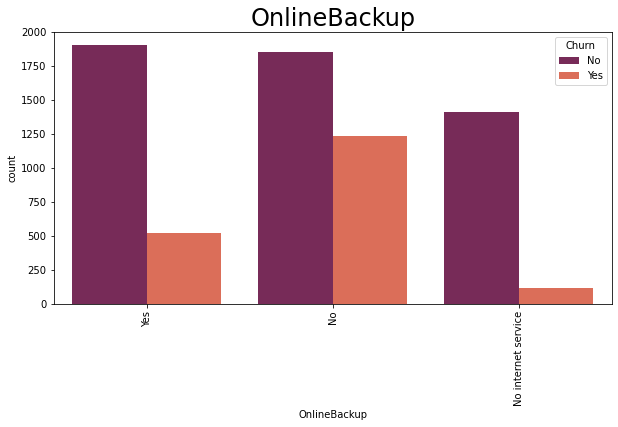

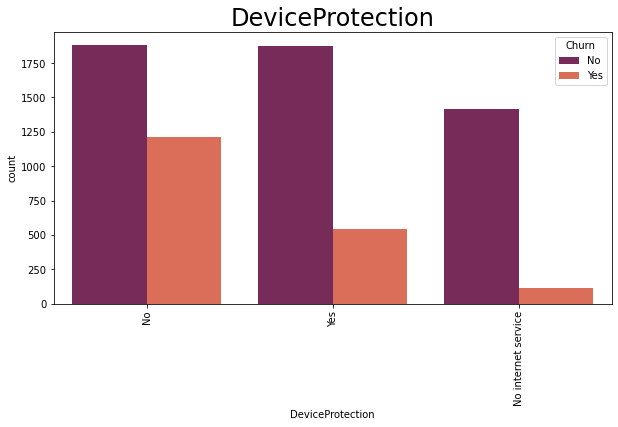

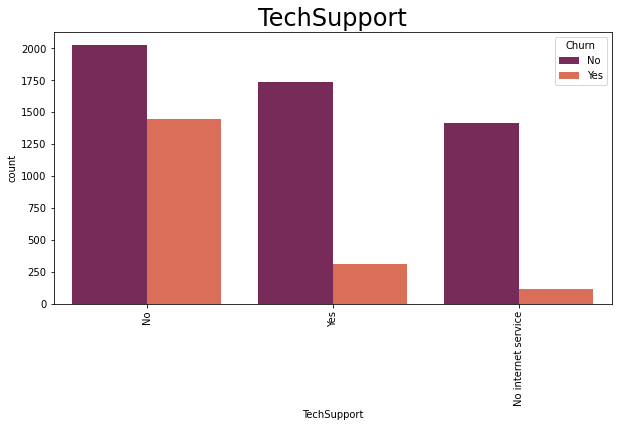

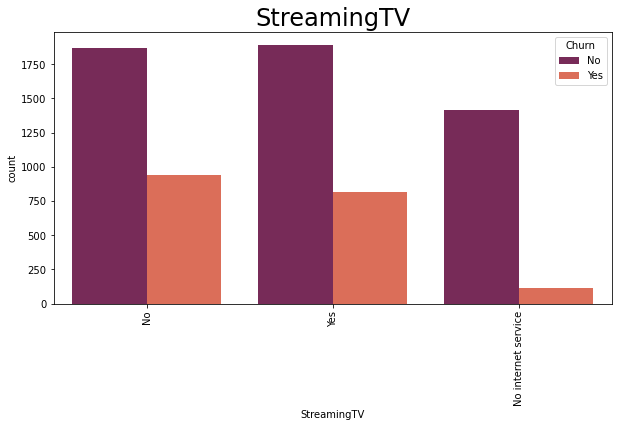

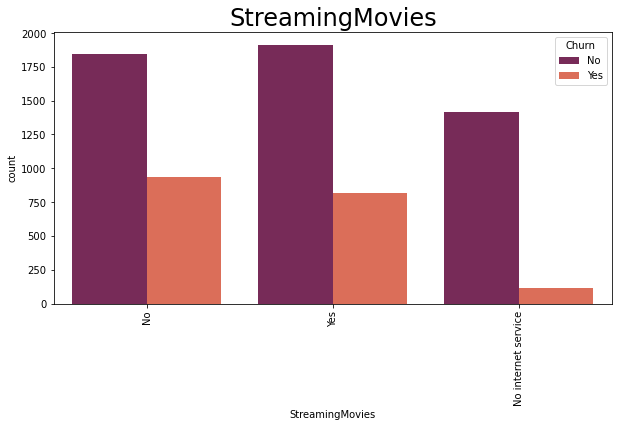

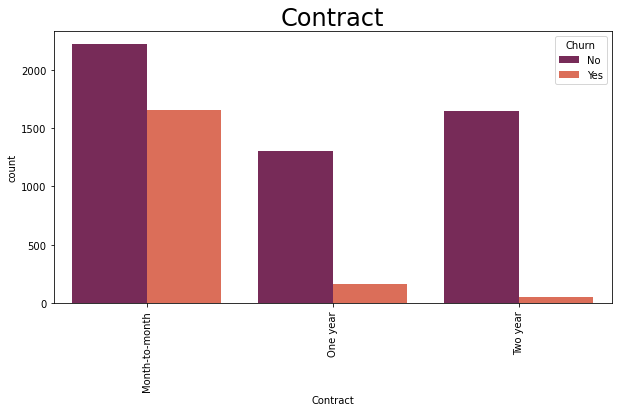

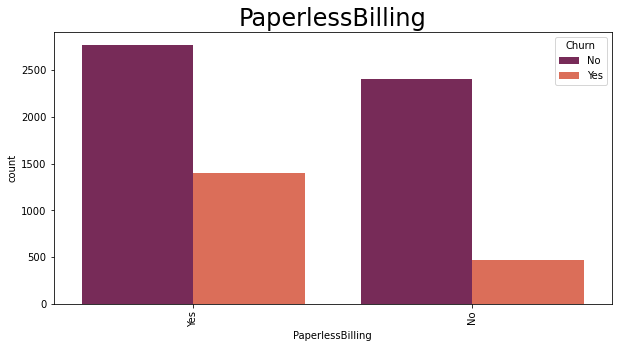

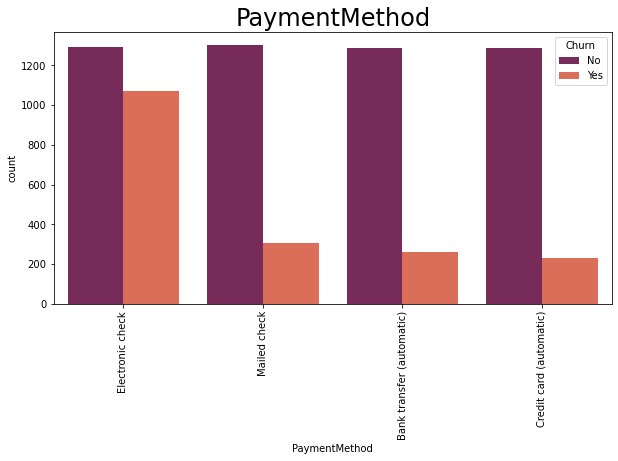

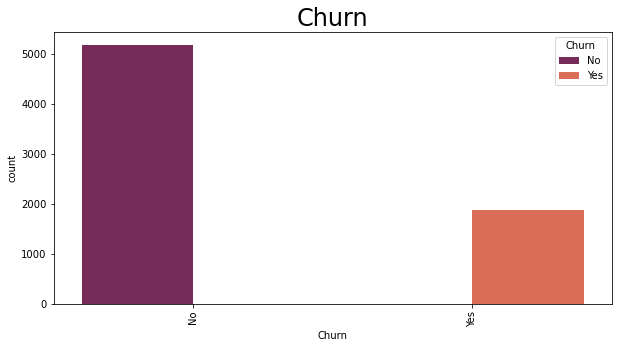

In [15]:
for i in obj:
    fig_size = (10,5)
    fig, ax = plt.subplots(figsize = fig_size)
    sns.countplot(data=churn, x=i, hue="Churn", palette="rocket" )
    plt.xticks(rotation=90)
    plt.title(i, fontsize = 24)
    

### Observation:

1. gender: 
    - Both Men and Women have lower churn count
2. Partner:
    - Customer without partners have high churn count
3. Dependents:
    - Customers without depedents have high churn count
4. PhoneService:
    - Customer with Phone service have high churn count

5. MultipleLines:
    - Customer with/ without Multiple lines have high churn count but customer without multiple lines have opted out more thn customer with multiple lines
6. InternetService:
    - Customer with DSL - opted out more
    - Customer with Fiber - opted out more but yet, have a good churn count
7. OnlineSecurity:
    - cutomer without online security - opted out but, yet have a good churn count
    - cutomer with online security - opted out more
8. OnlineBackup: 
    - customer with online backup opted out more 
    - customer without online backup opted out but yet have a good churn count.
    
9. DeviceProtection:
    - customer without device protection opted out more but, yet have a good churn count
    - customers with device protection opted out more.

10. TechSupport:
    - customers without Techsupport opted out more but, yet have a good churn count
    - customers with Tech support opted out more
    
11. StreamingTV:
    - Both the categories with streaming Tv and without streaming Tv have opted in and out equally
    
12. StreamingMovies:
    - Both the categories with Streaming Movies and without Streaming Movies have opted in and out equally
    
13. Contract:
    - customers contract created through mouth to mouth marketing opted out more but, yet have a good churn count
    - One year contract and Two year contract has less churn count.
    
14. PaperlessBilling:
    - Customer with paperless billing have opted to move out, yet have a good churn count
    
15. PaymentMethod:
    - Customer with payment method as electronic check has good churn count
    
16. Churn:
    - The entire dataset has more counts of customer who have opted out. 
    

- customer with no internet service have not opted to stay with the company and hence focusing on them would allow the company to increase  retention rate

### Handling Numerical Variables

In [16]:
num = []
for x in churn.columns:
    if churn[x].dtypes == "int64" or churn[x].dtypes == "float64" :
        num.append(x)

In [17]:
num

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

### Bivariate Analysis

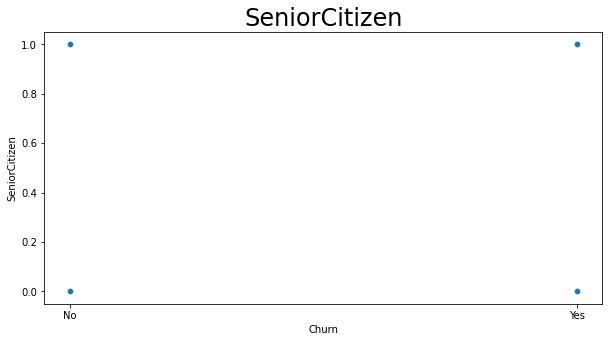

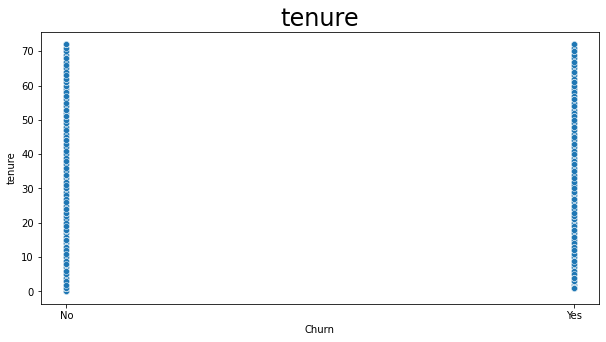

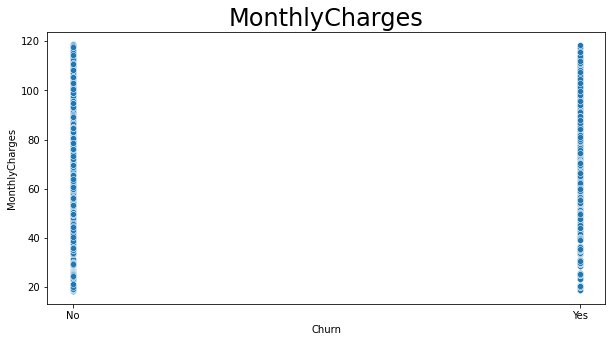

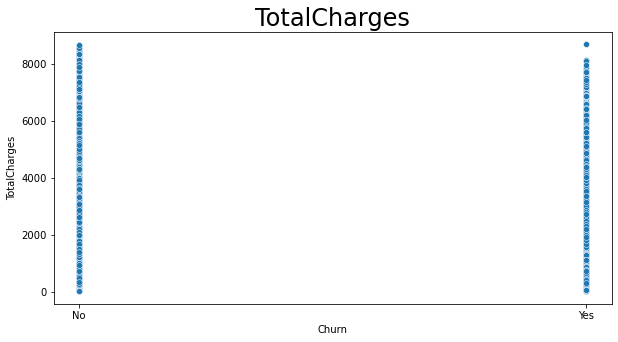

In [18]:
for i in num:
    fig_size = (10,5)
    fig, ax = plt.subplots(figsize = fig_size)
    plt.title(i, fontsize=24)
    sns.scatterplot(x="Churn", y= i, data=churn)  

#### All the numeric columns are similar to each other and has no difference for customers who have opted in or customers who have opted out

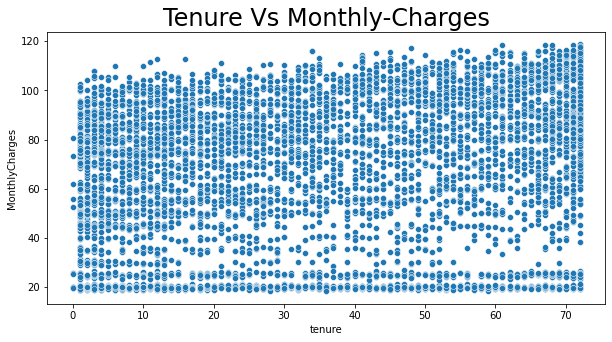

In [19]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Tenure Vs Monthly-Charges", fontsize=24)
sns.scatterplot(x="tenure", y= "MonthlyCharges", data=churn) 

## NO RELATIONHIP BETWEEN TENURE AND MONTHLY CHARGES

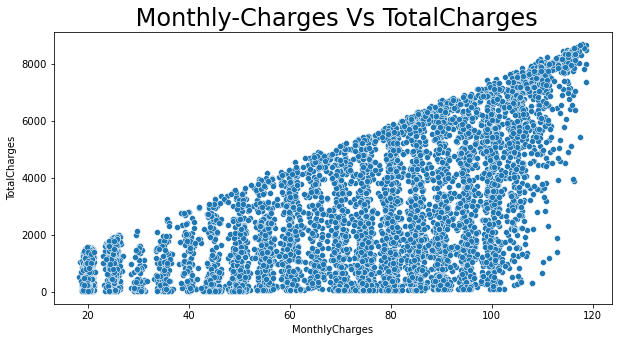

In [20]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title(" Monthly-Charges Vs TotalCharges", fontsize=24)
sns.scatterplot(x='MonthlyCharges', y= 'TotalCharges', data=churn)

### Positive LINEAR RELATIONSHIP BETWEEN TOTALCHARGES AND MONTHLY CHARGES

In [21]:
obj

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Multivariate analysis

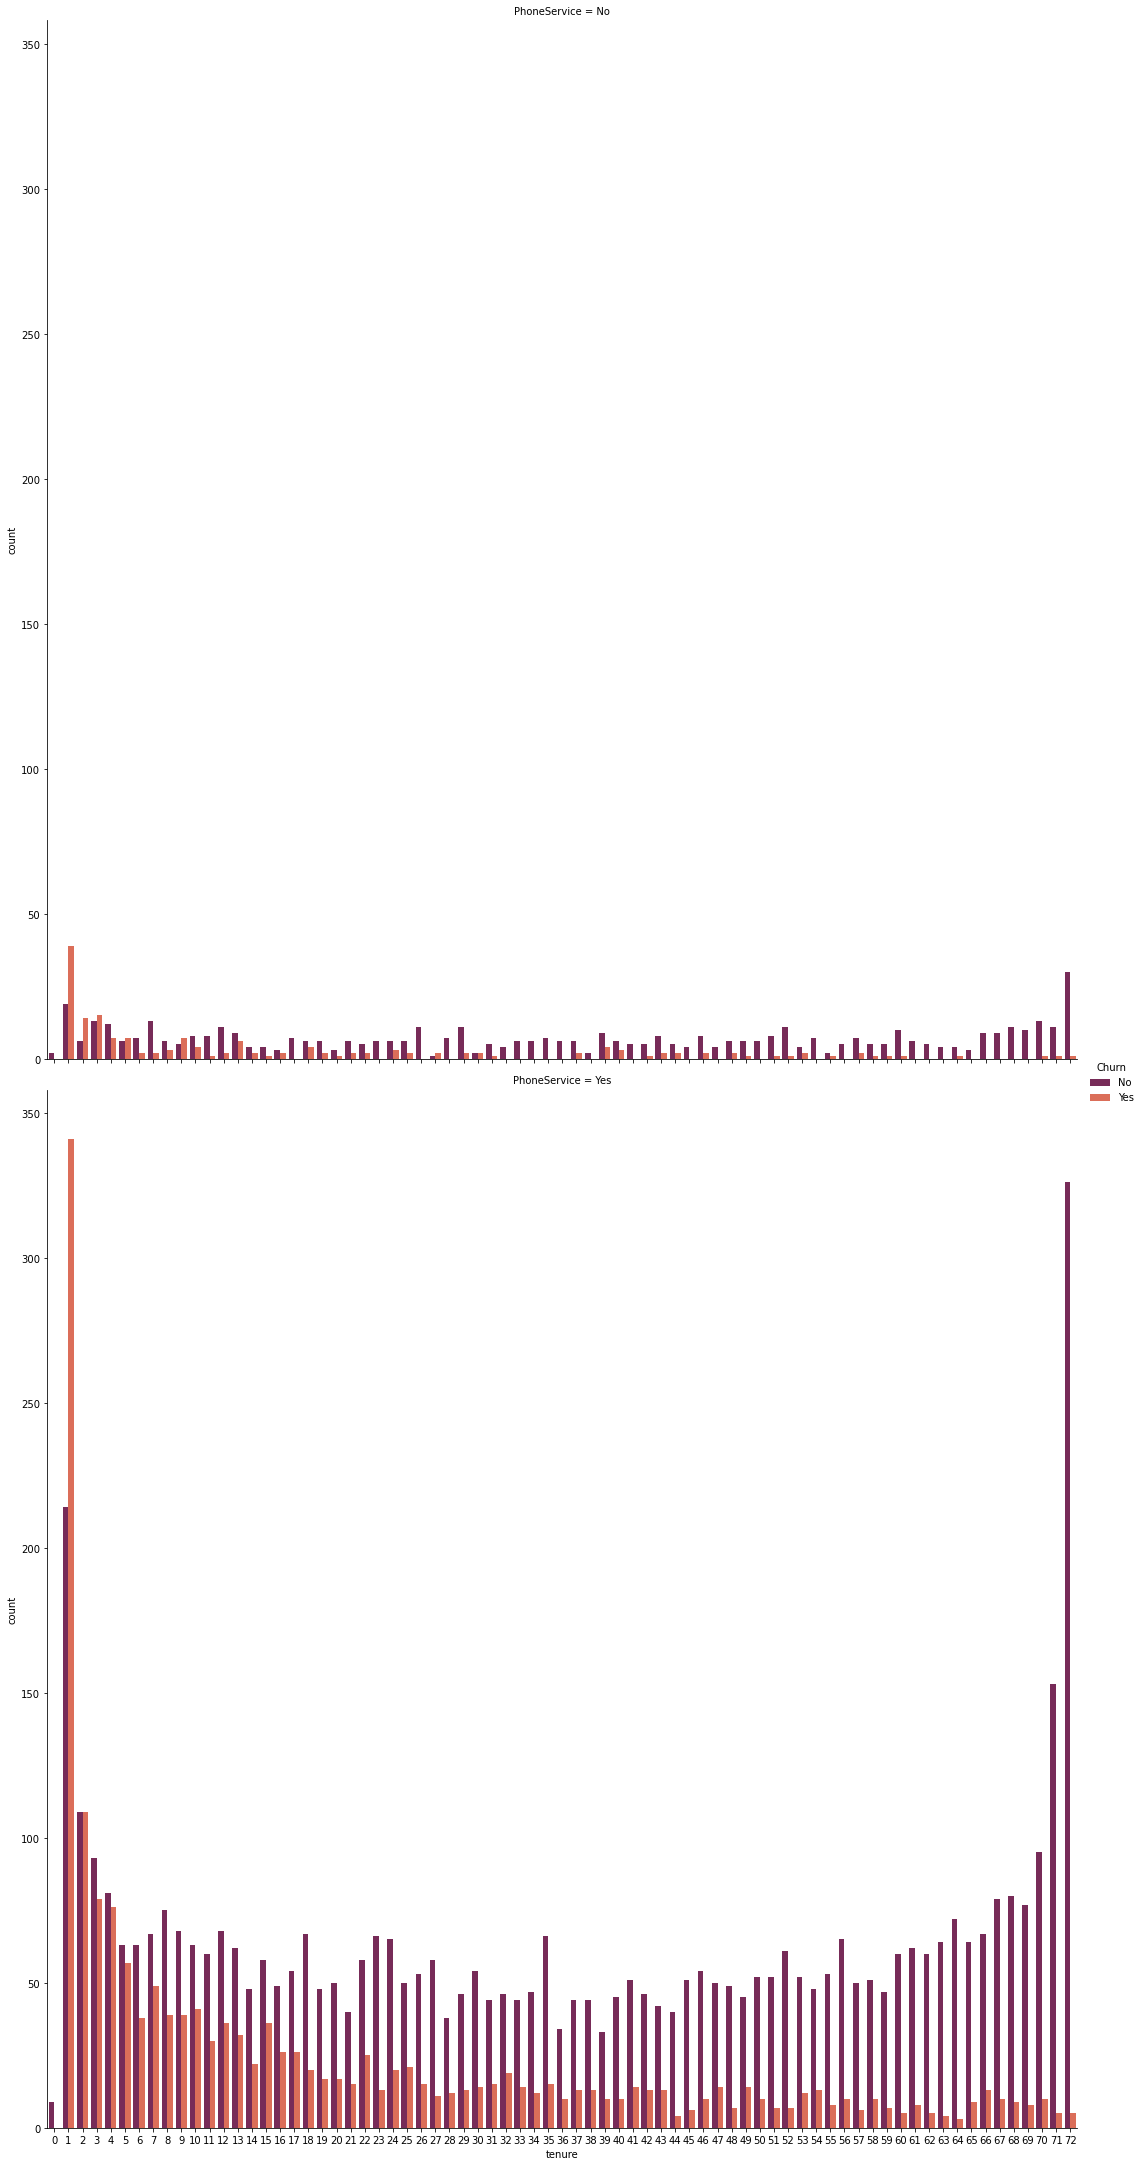

In [22]:

sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='PhoneService', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

### people with phone service and under a tenure of 1 have higher churn count

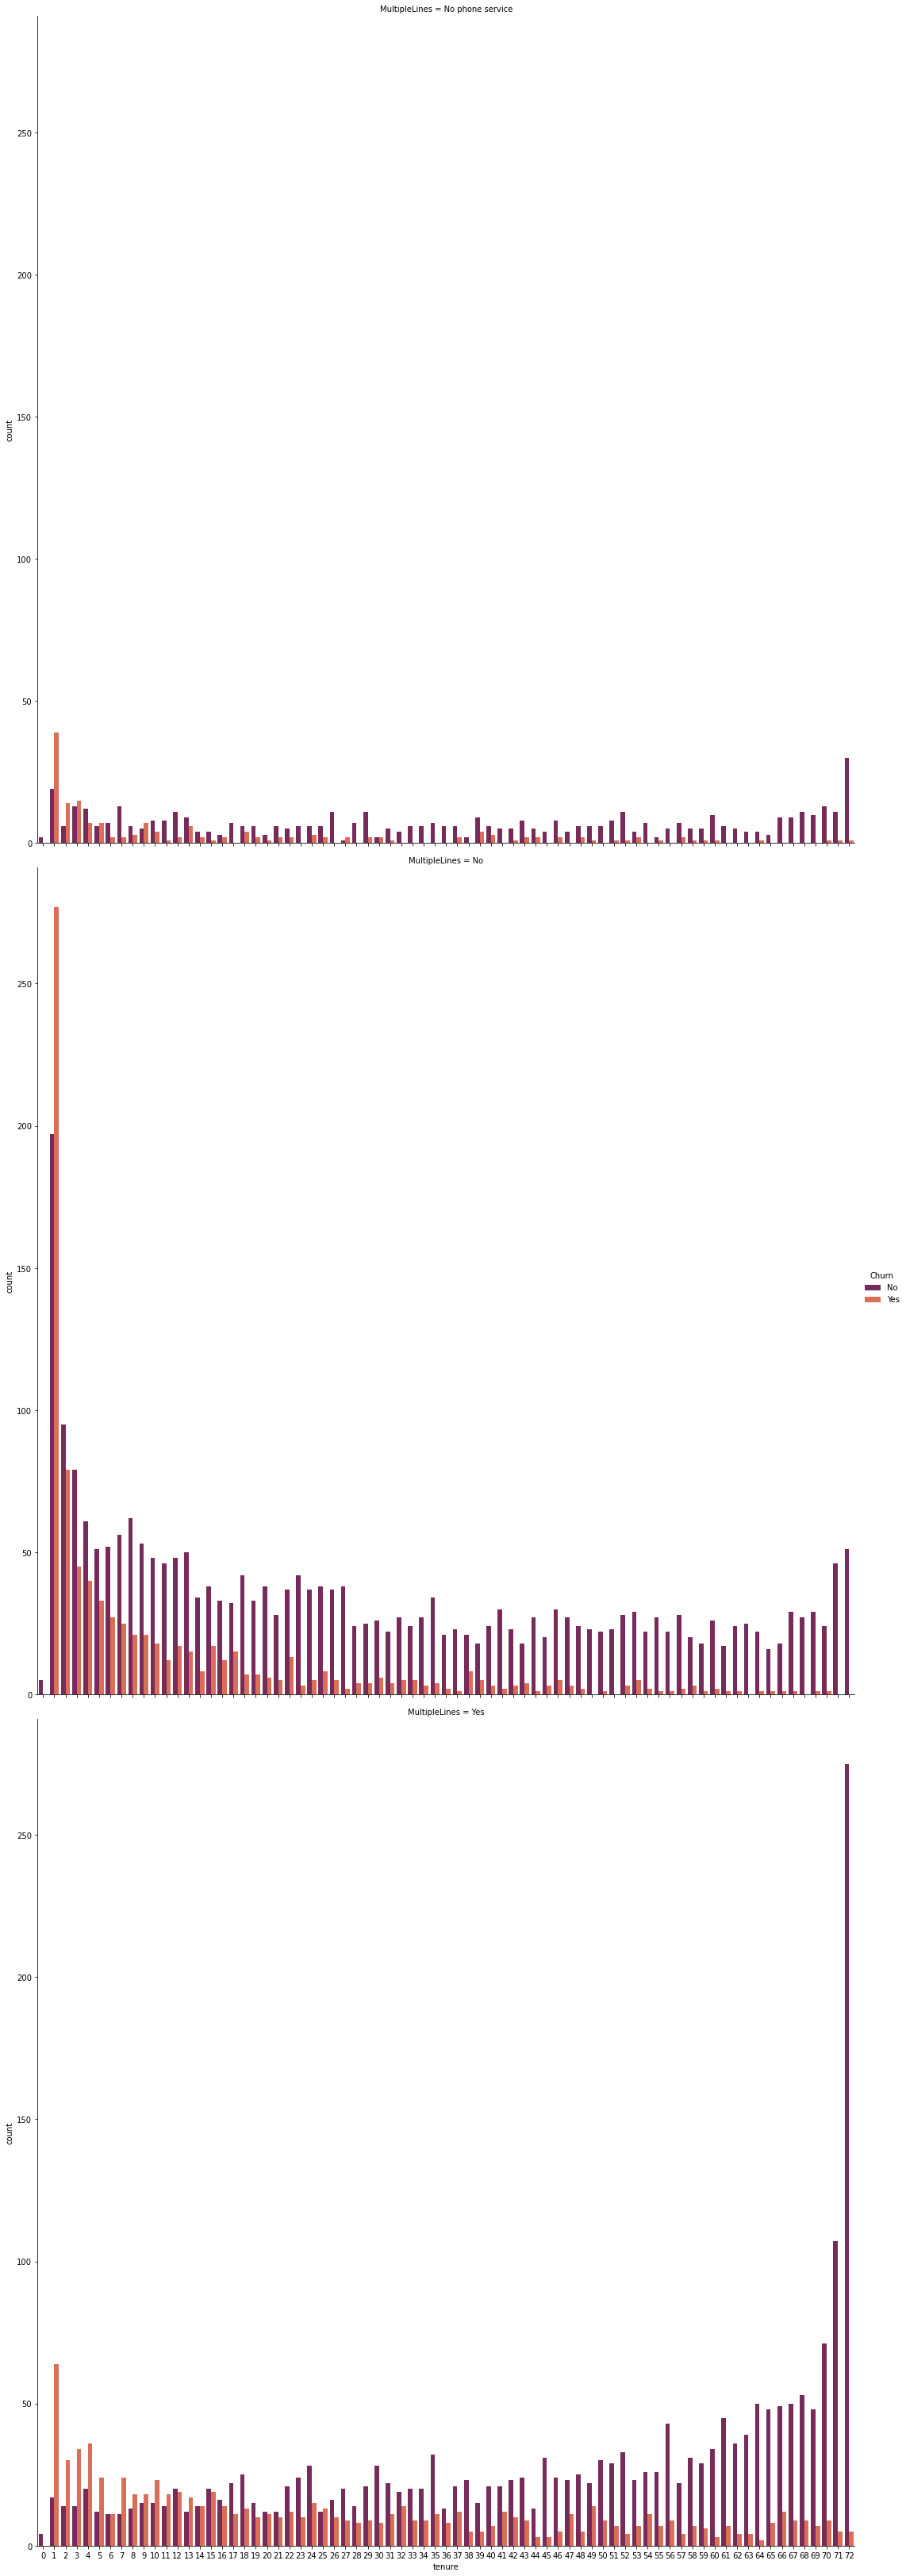

In [23]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='MultipleLines', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer with multiple lines and with a shorted tenure from 1 to 10 have a good churn count.
- Customer with multiple lines and above tenure of 10 have opted out of the service
---------------
- customer without multiple lines and with a shorter tenure of 1 - 12 have a good churn count
- customer without multiple lines and above a tenure of 12 have opted out of the service`

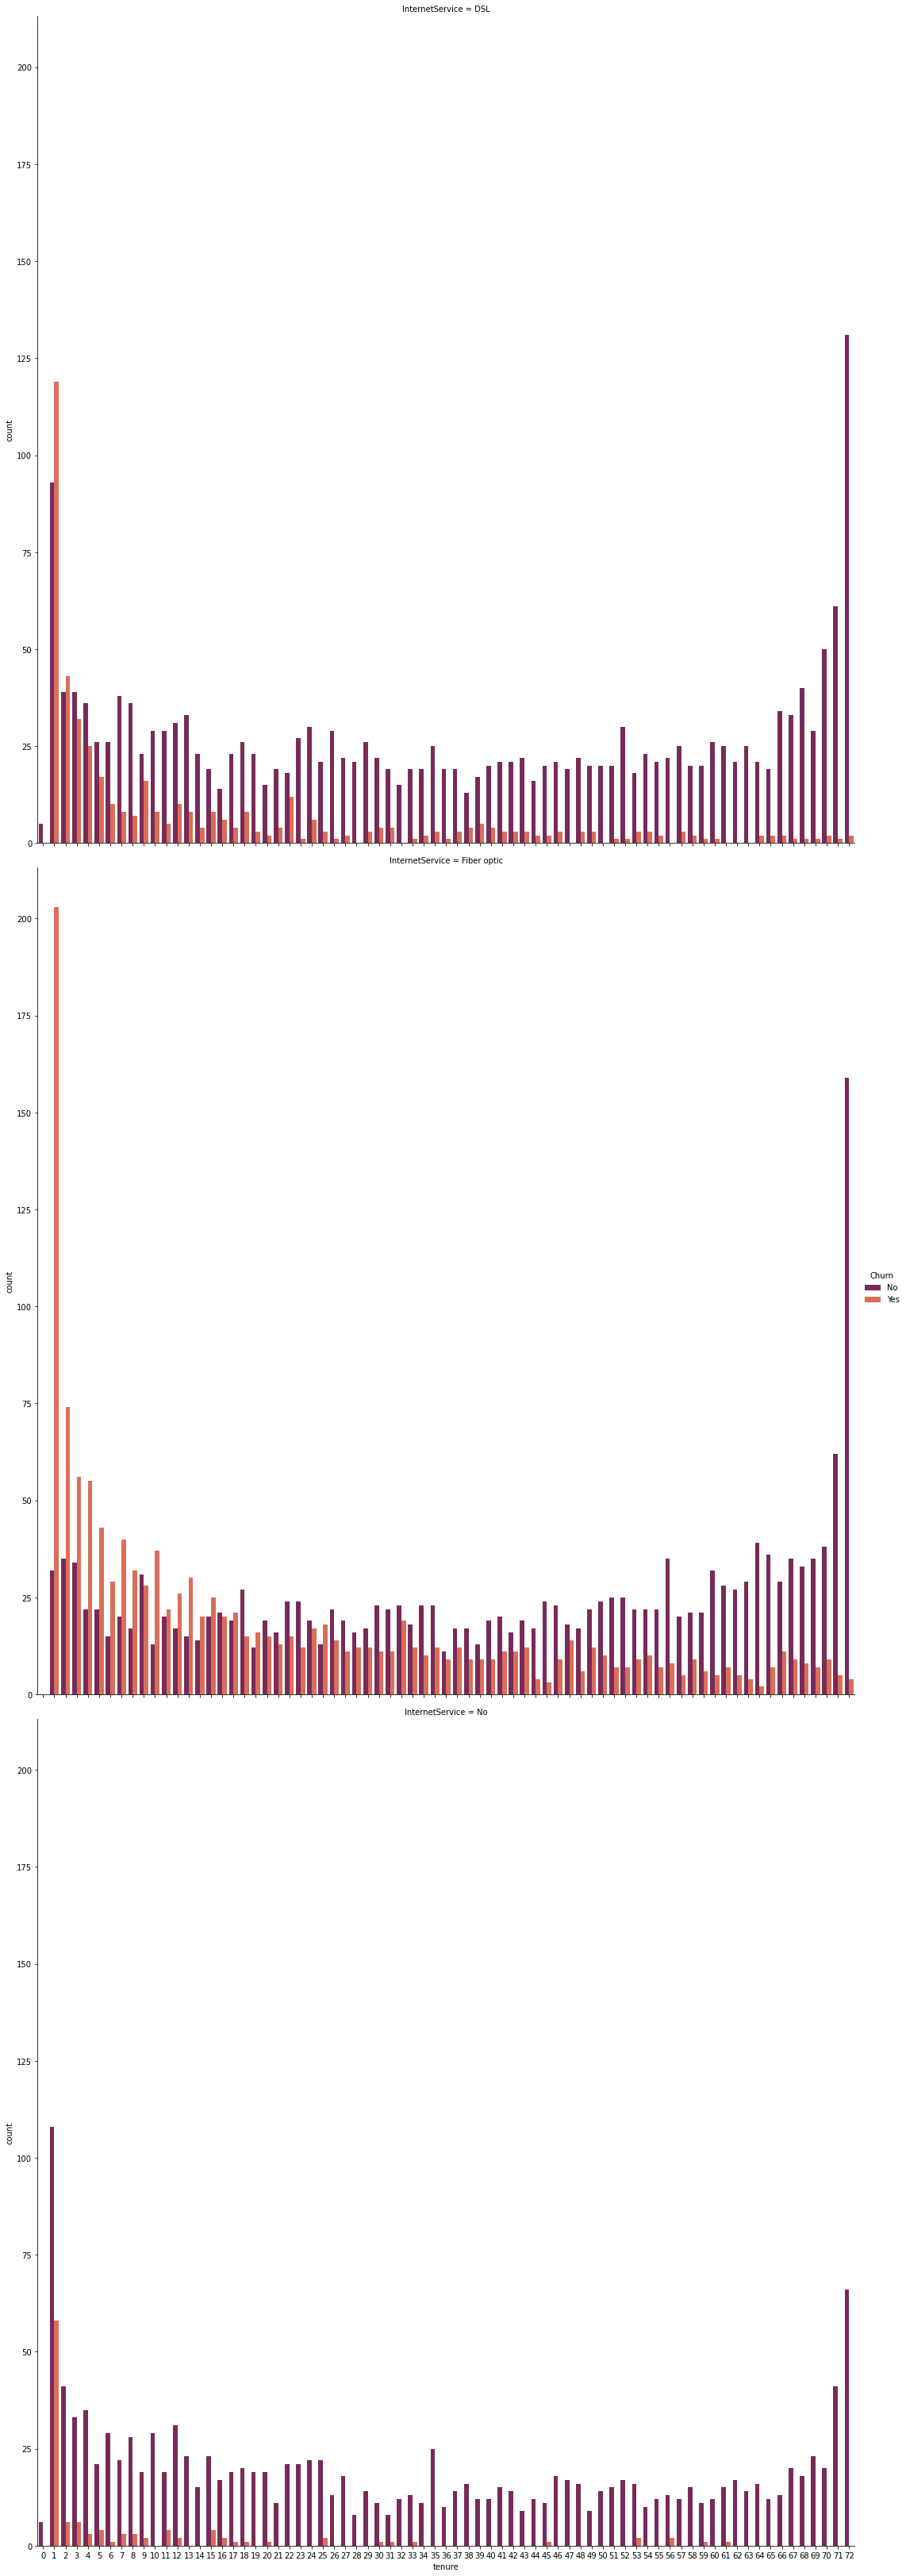

In [24]:

sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='InternetService', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer with shorter tenure and DSL have good churn count
- customer with fiber optic interne tand with a tenure between 1 to 18 have opted in and the the trnd seems to be poitive for some years in tenure
- customer with no internet service NO POSITIVE CHURN COUNT

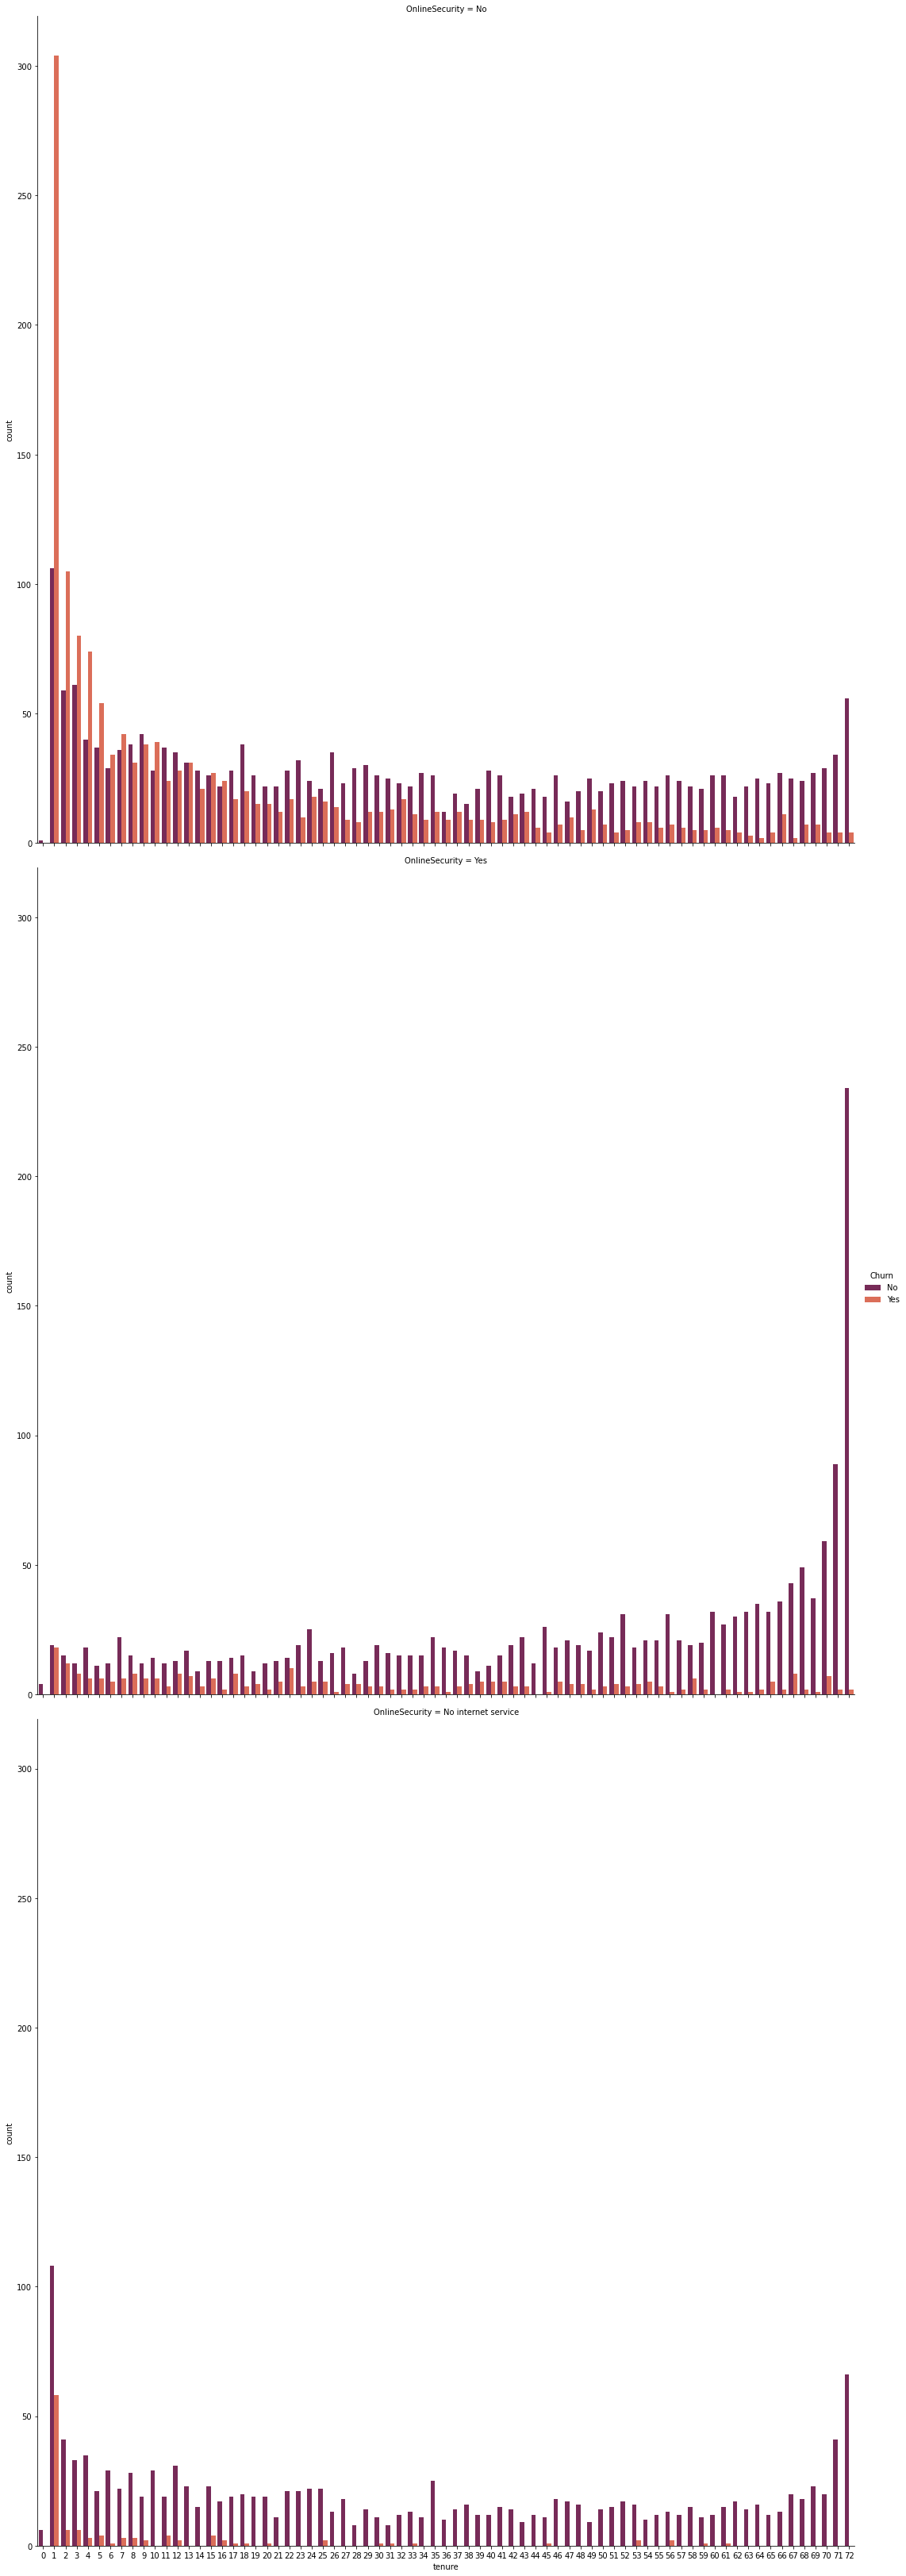

In [25]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='OnlineSecurity', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- customer with no online security and a shorter tenure have good churn count
- customer with online security LOW CHURN RATE
- No churn rate for customer with internet service

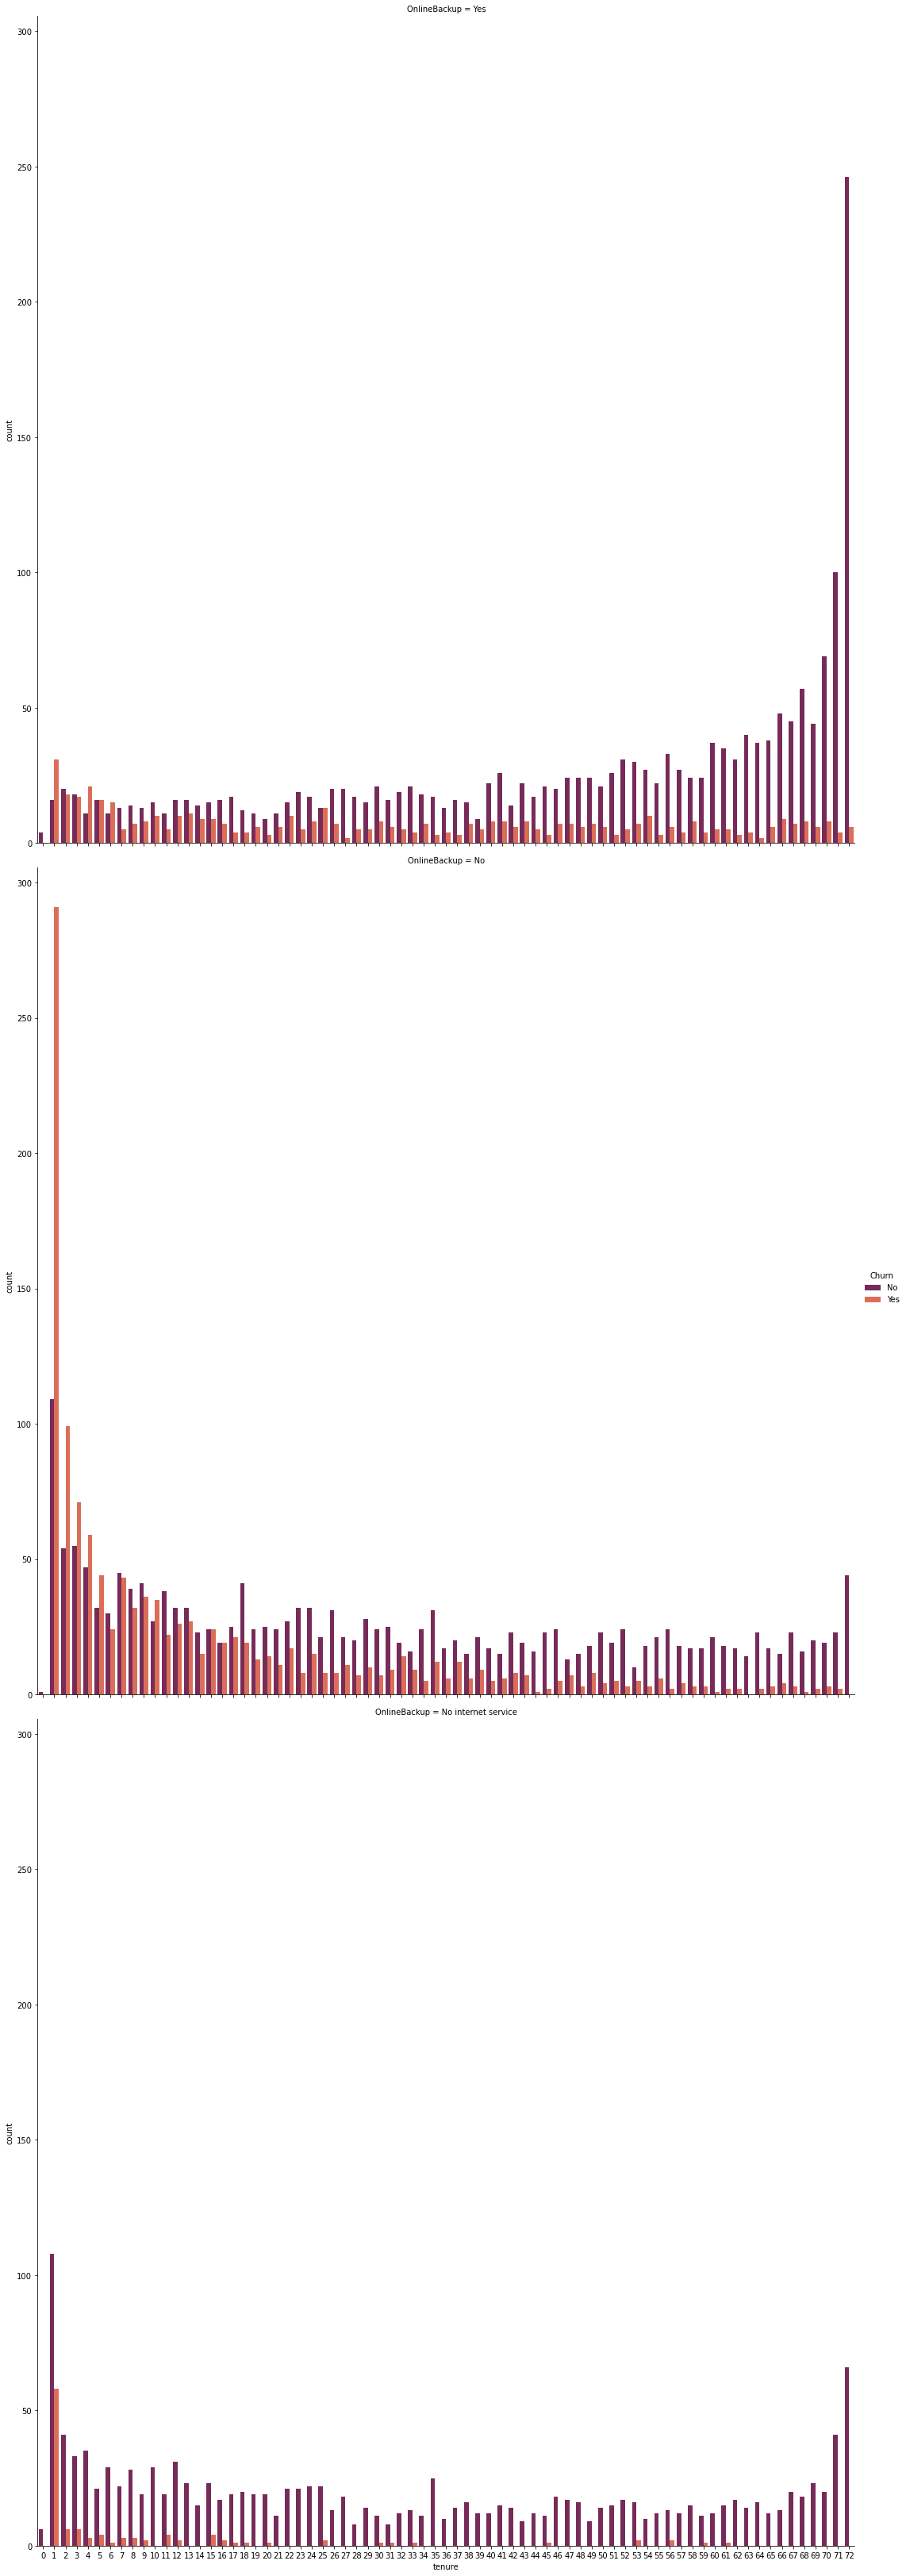

In [26]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='OnlineBackup', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

customer with online backup and a tenure of 1 to 5 have good churn rate after which the churn count decline
customer without online backup and a shorter tenure have a good churn rate afte which the churn count decline

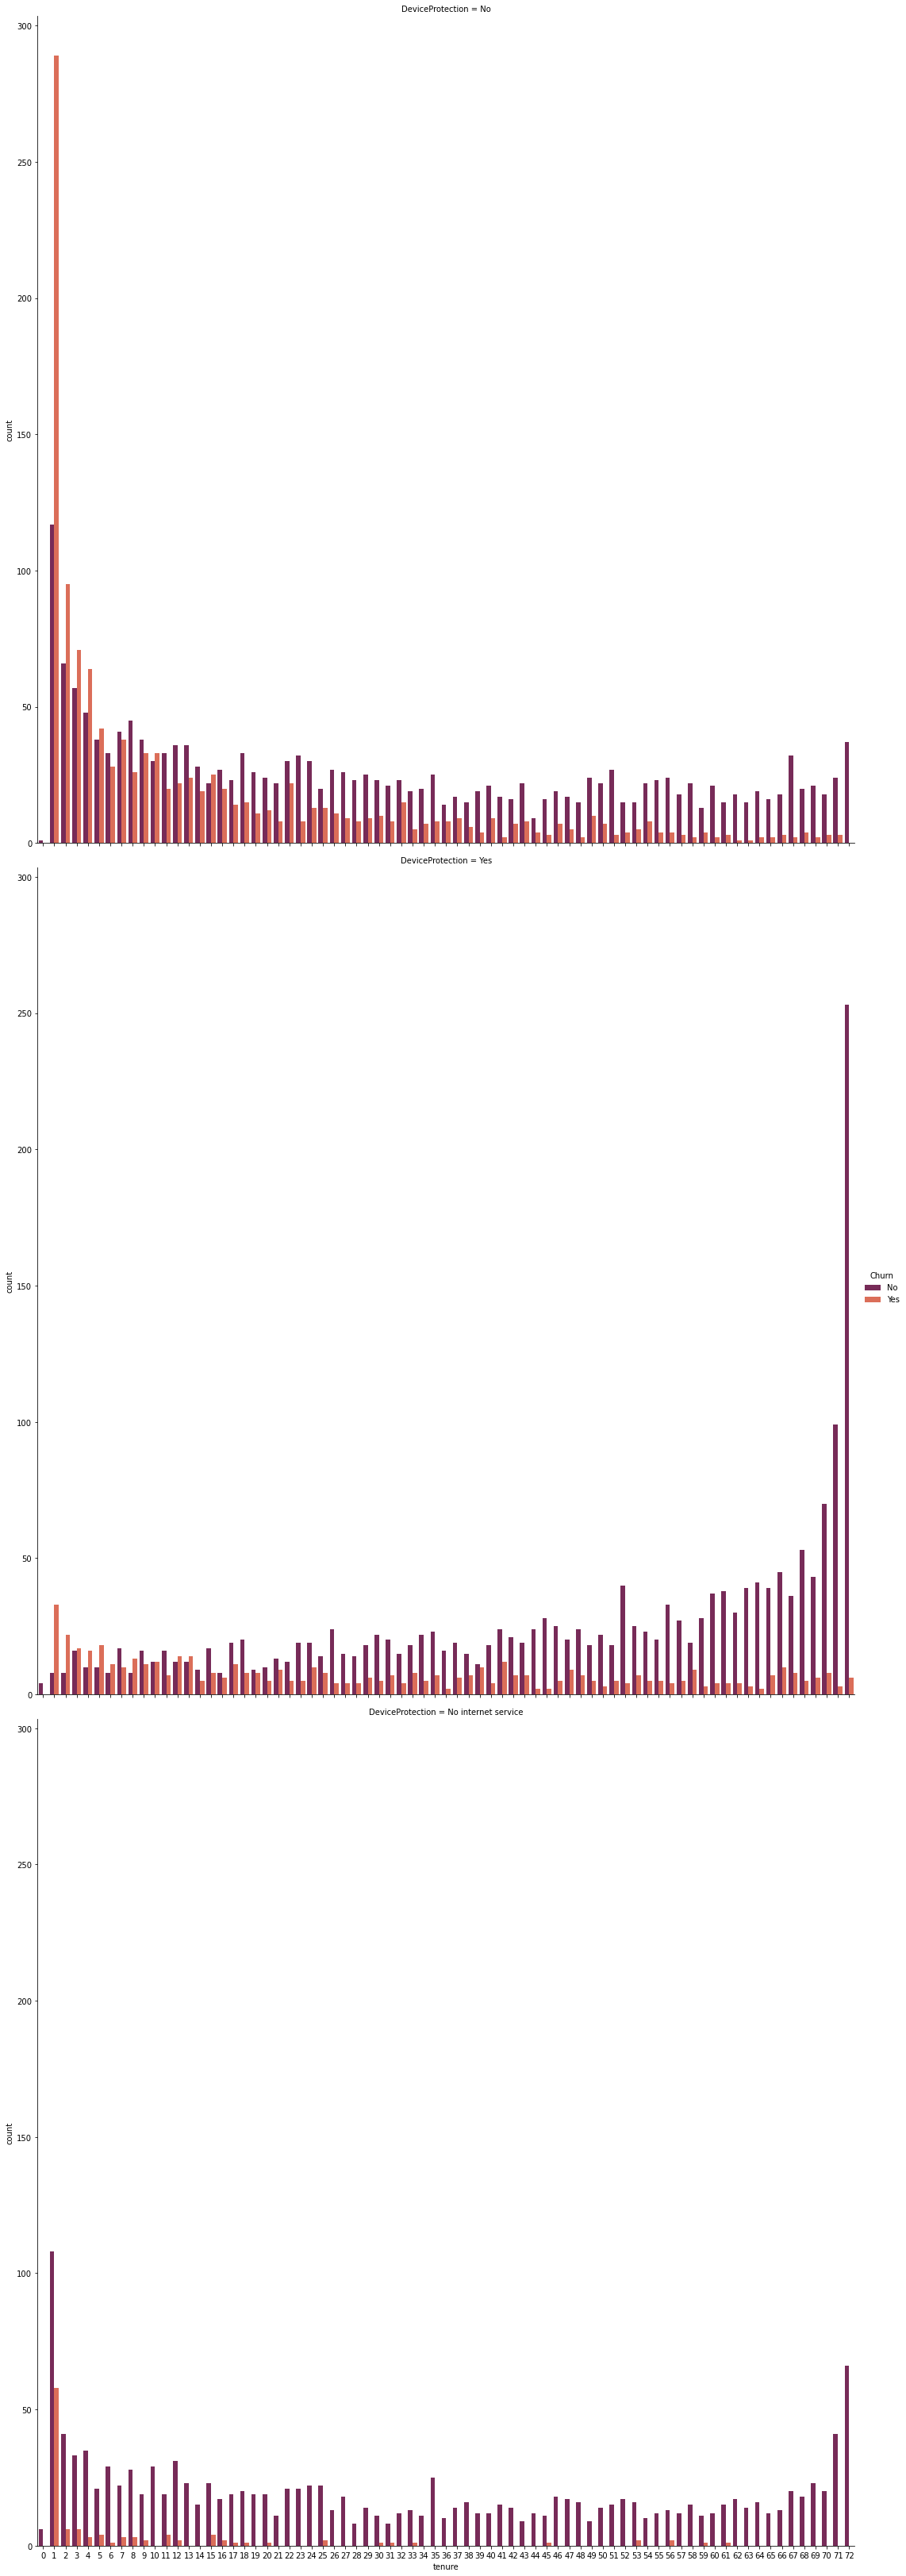

In [27]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='DeviceProtection', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer with no device protection and shorter tenure good churn count as the years increase the churn count decline
- Customer with device protection have more towards longer tenures and low churn count

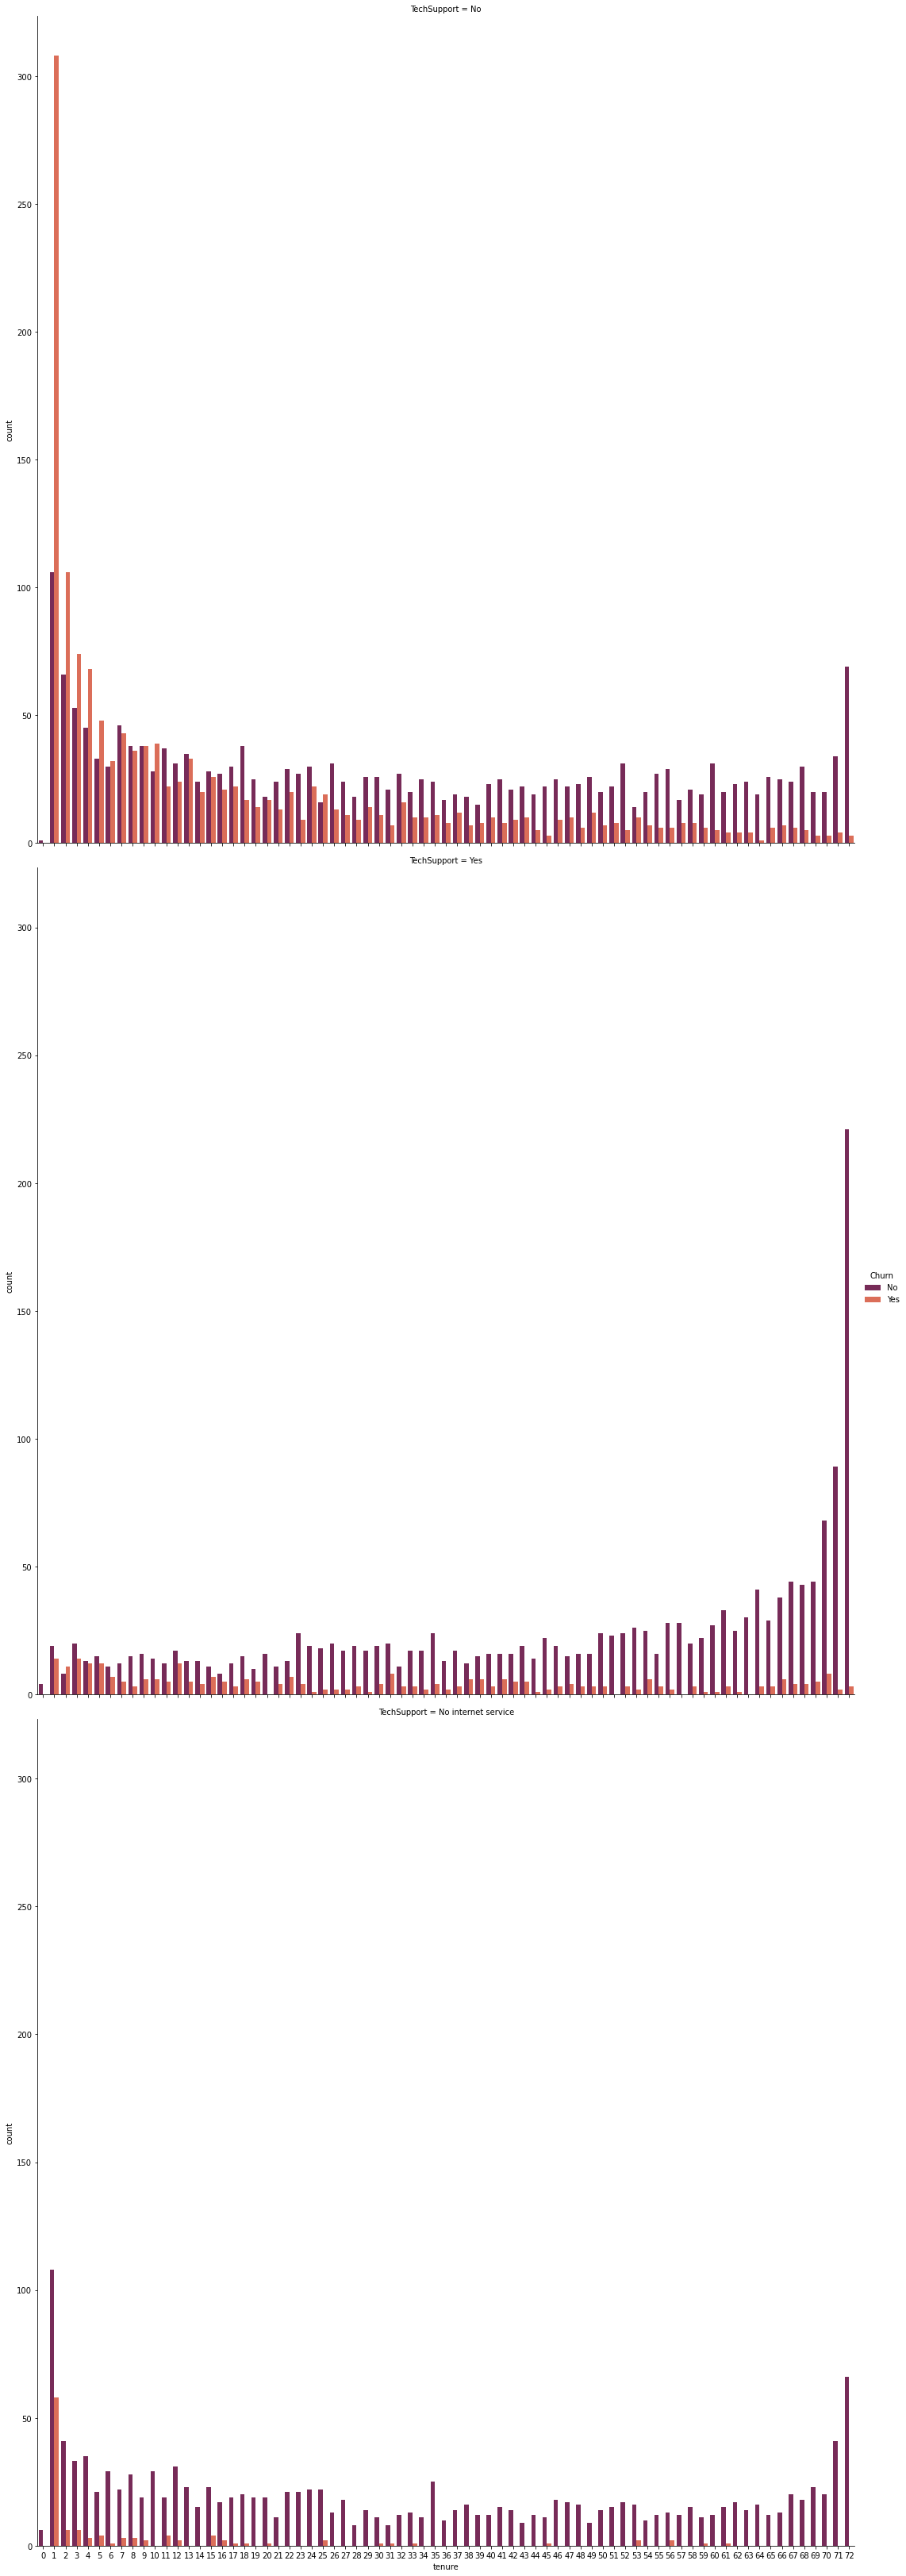

In [28]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='TechSupport', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer without techsupport and shorter tenure have good churn count
- Customer with techsupport have no positive churn count. 
- No internet service but 1 year of tenure good churn count but no positive trend but a negative trend

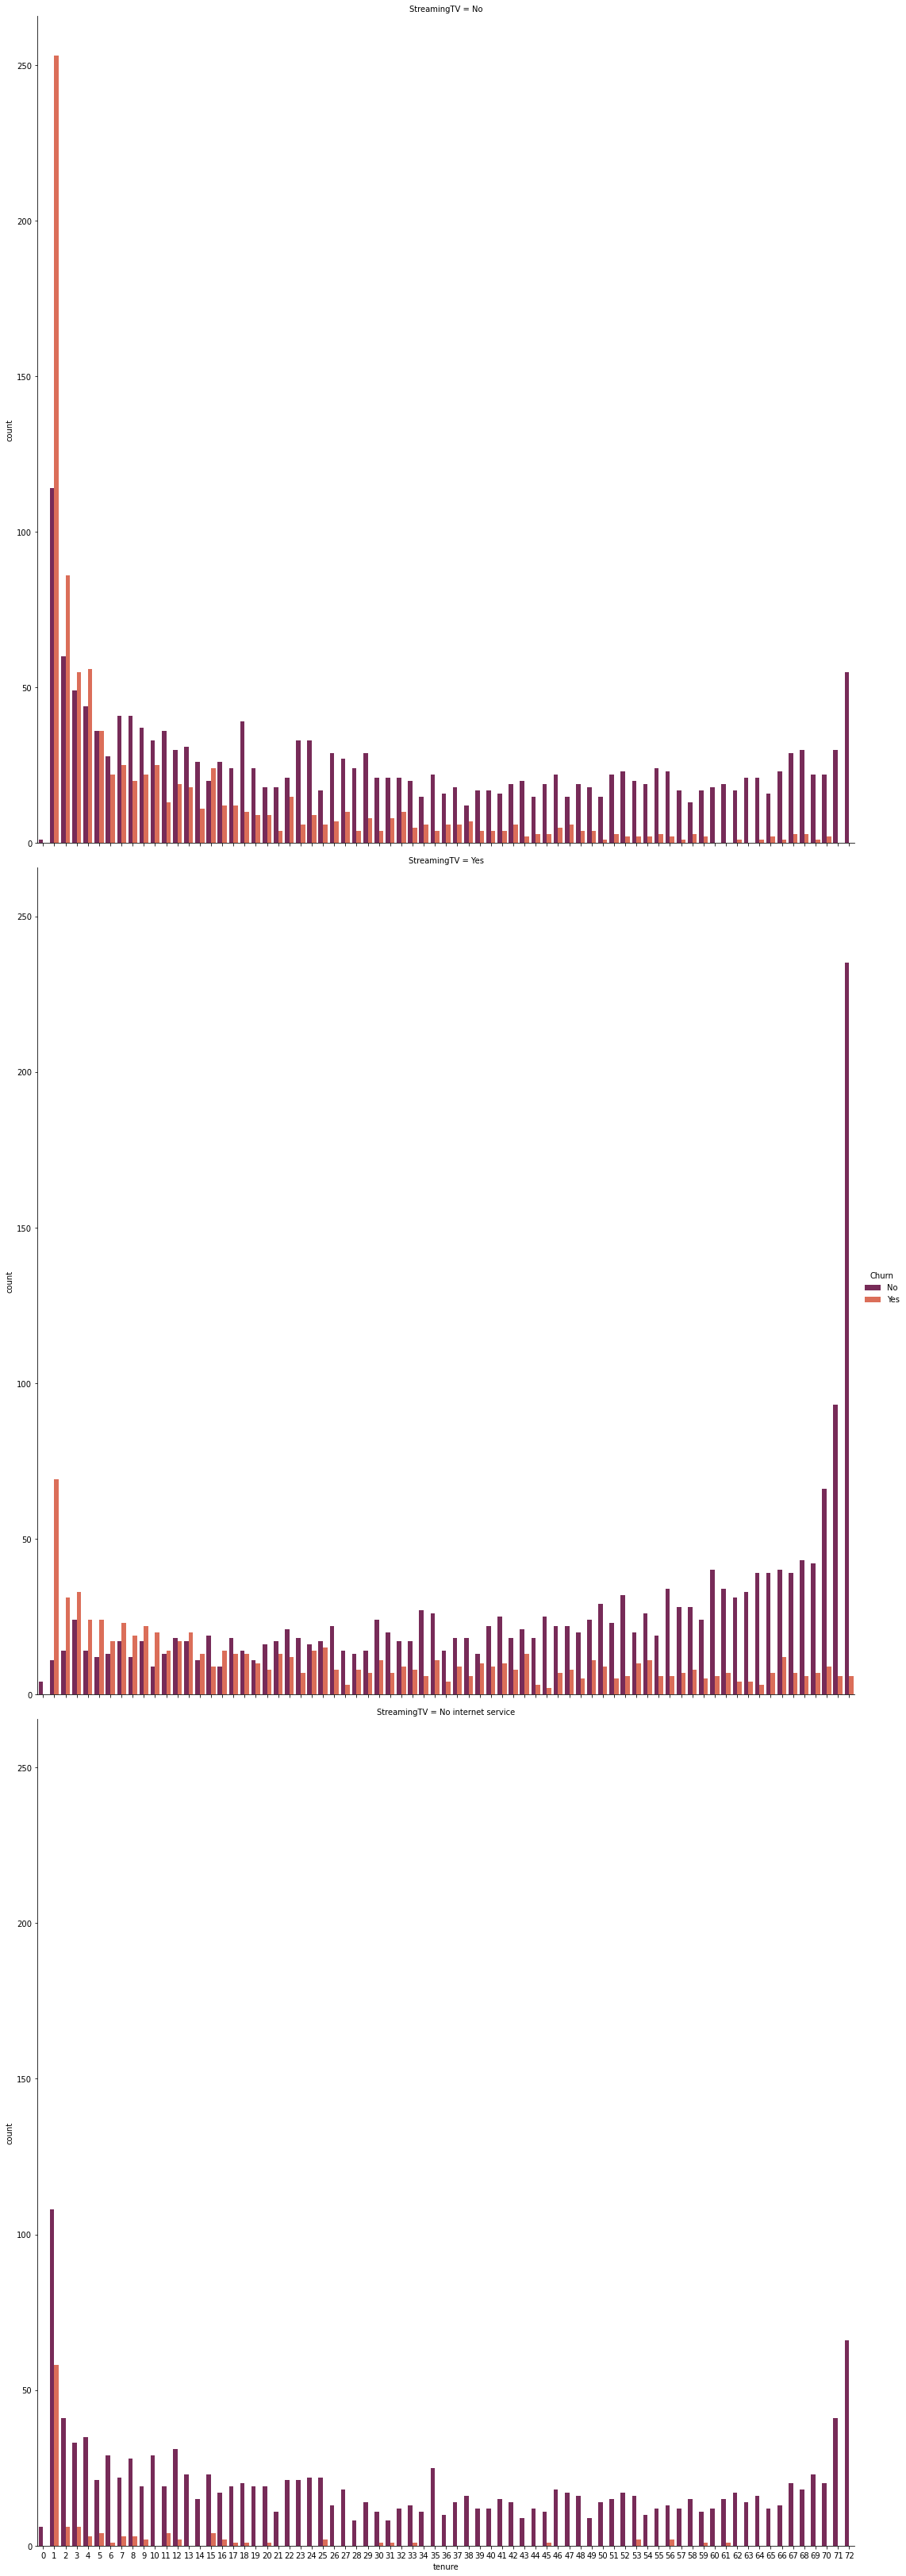

In [29]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='StreamingTV', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer with streaming tv and shorter tenure have good churn count and the churn count decline as the tenure increase
- Customer without streamung Tv and shorter tenure have good churn

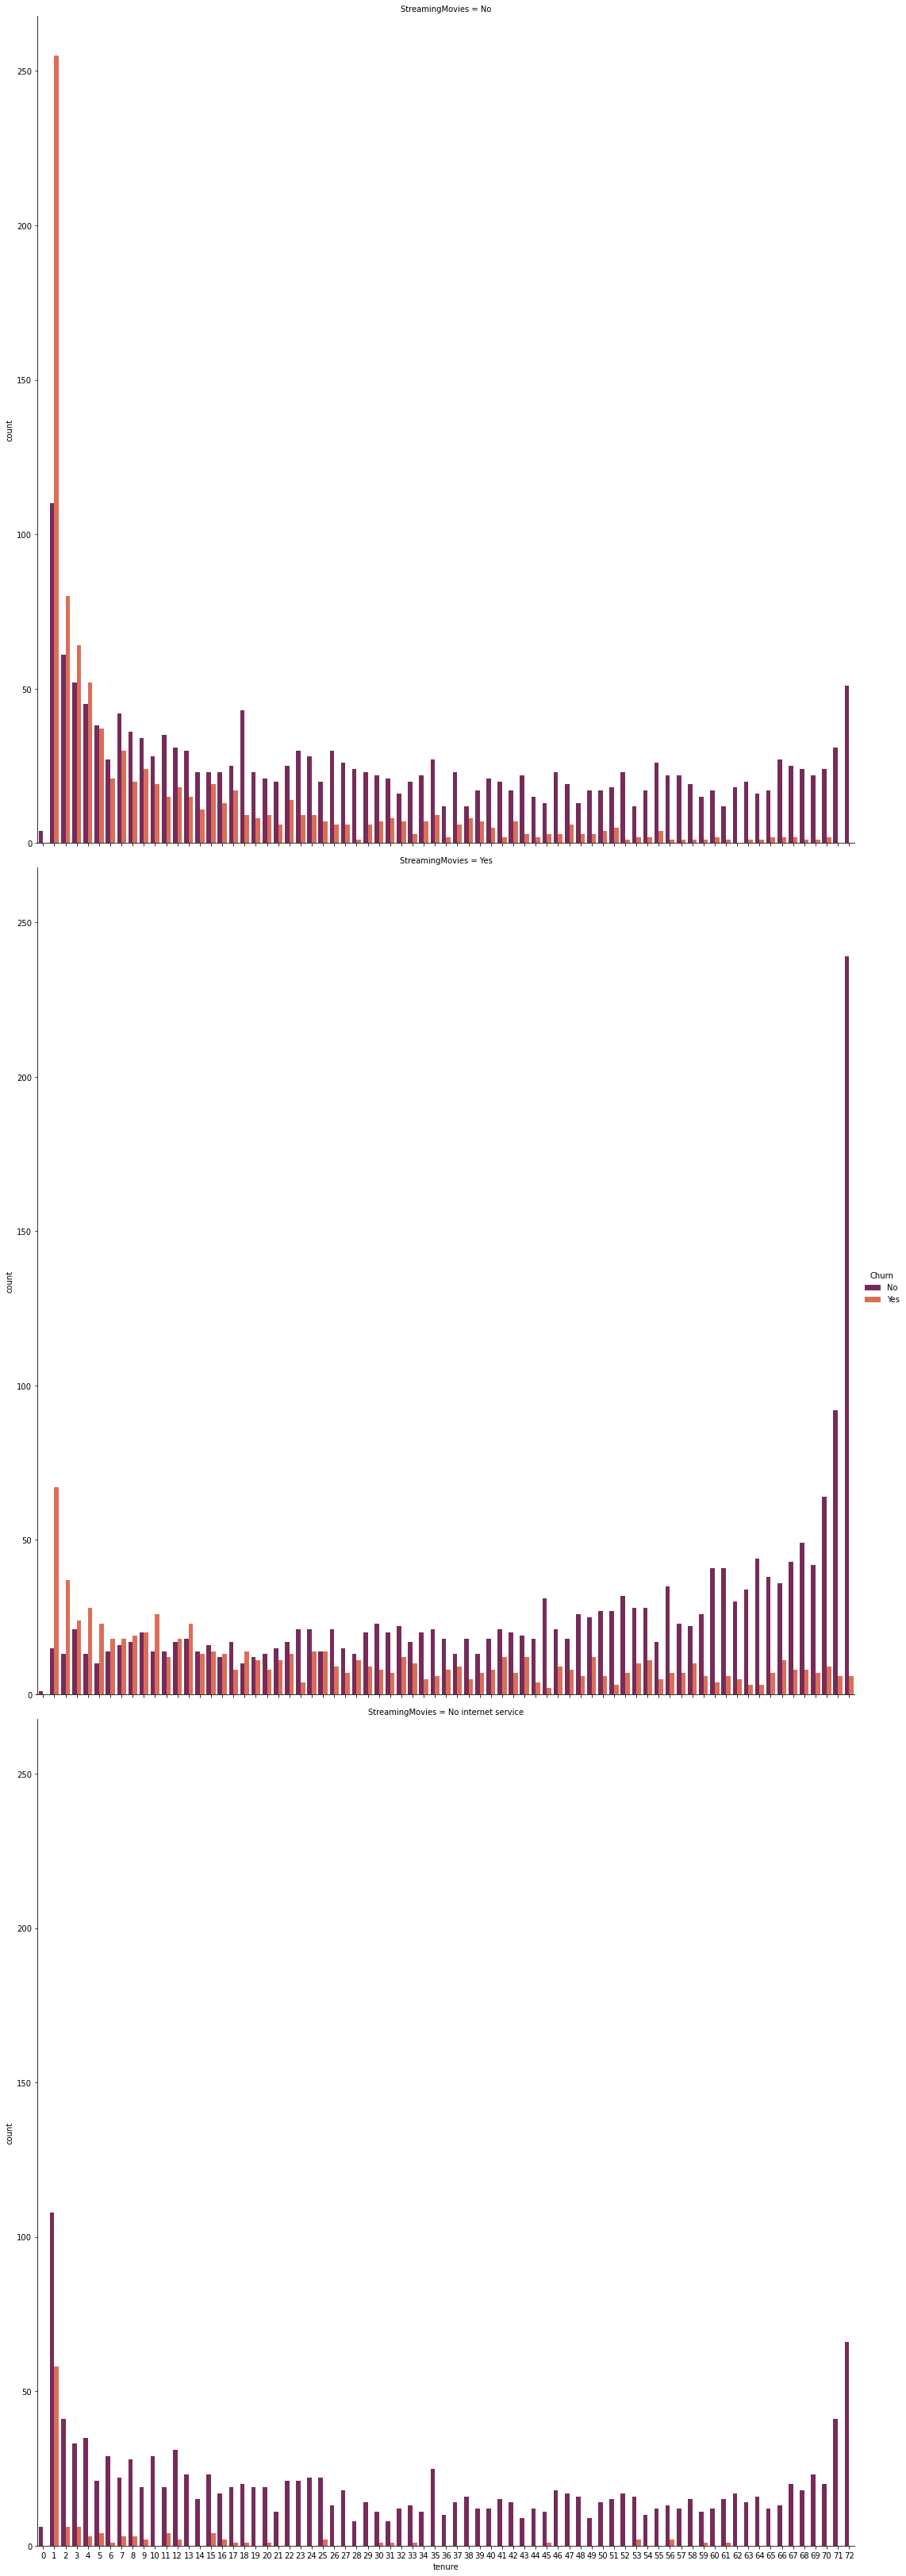

In [30]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='StreamingMovies', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- shorter tenure more churn count.
- Internet servic negative trend

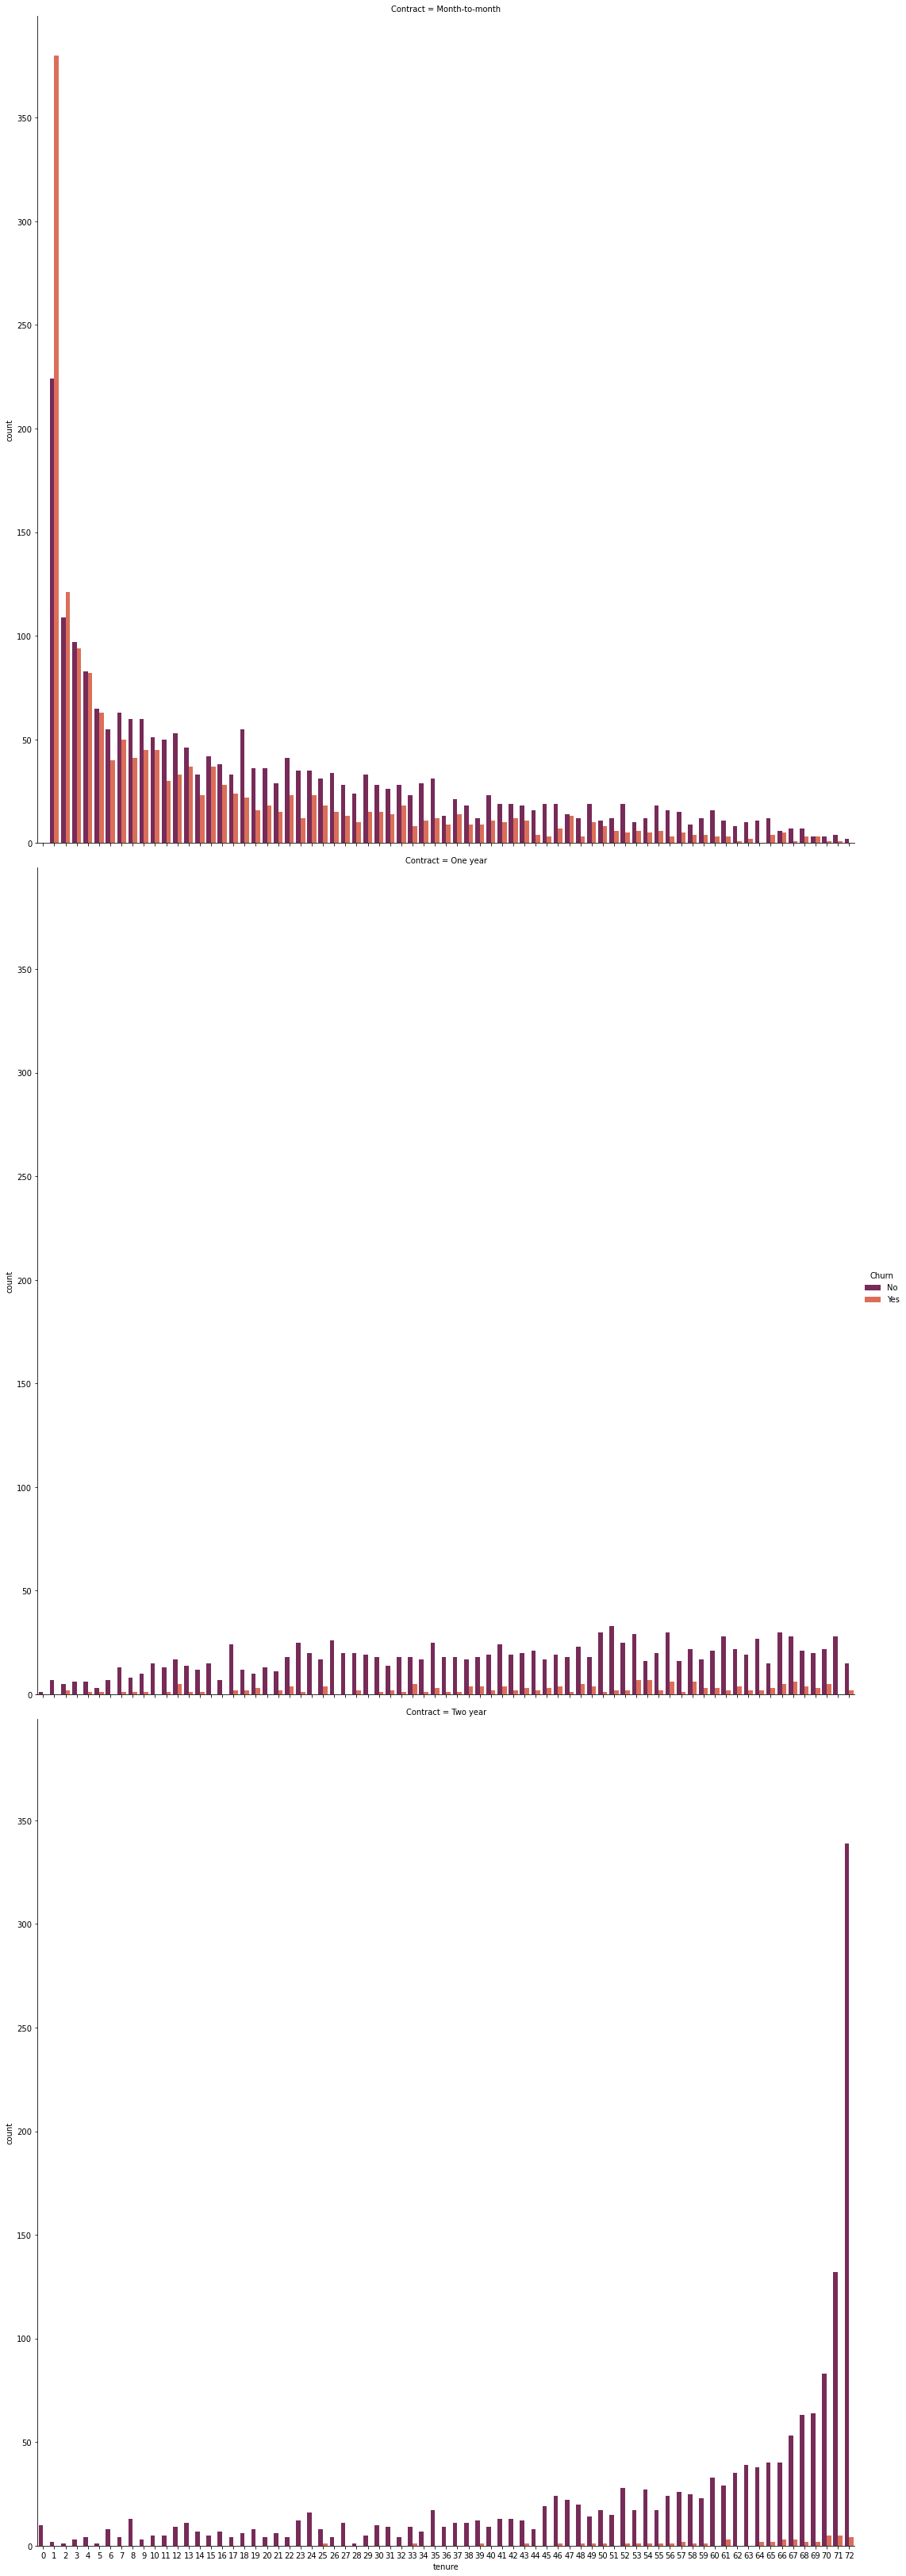

In [31]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn",
            col_wrap=1, 
            col='Contract', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer with one and two year contract has no trend.
- Mouth to mouth contract has good churn count.

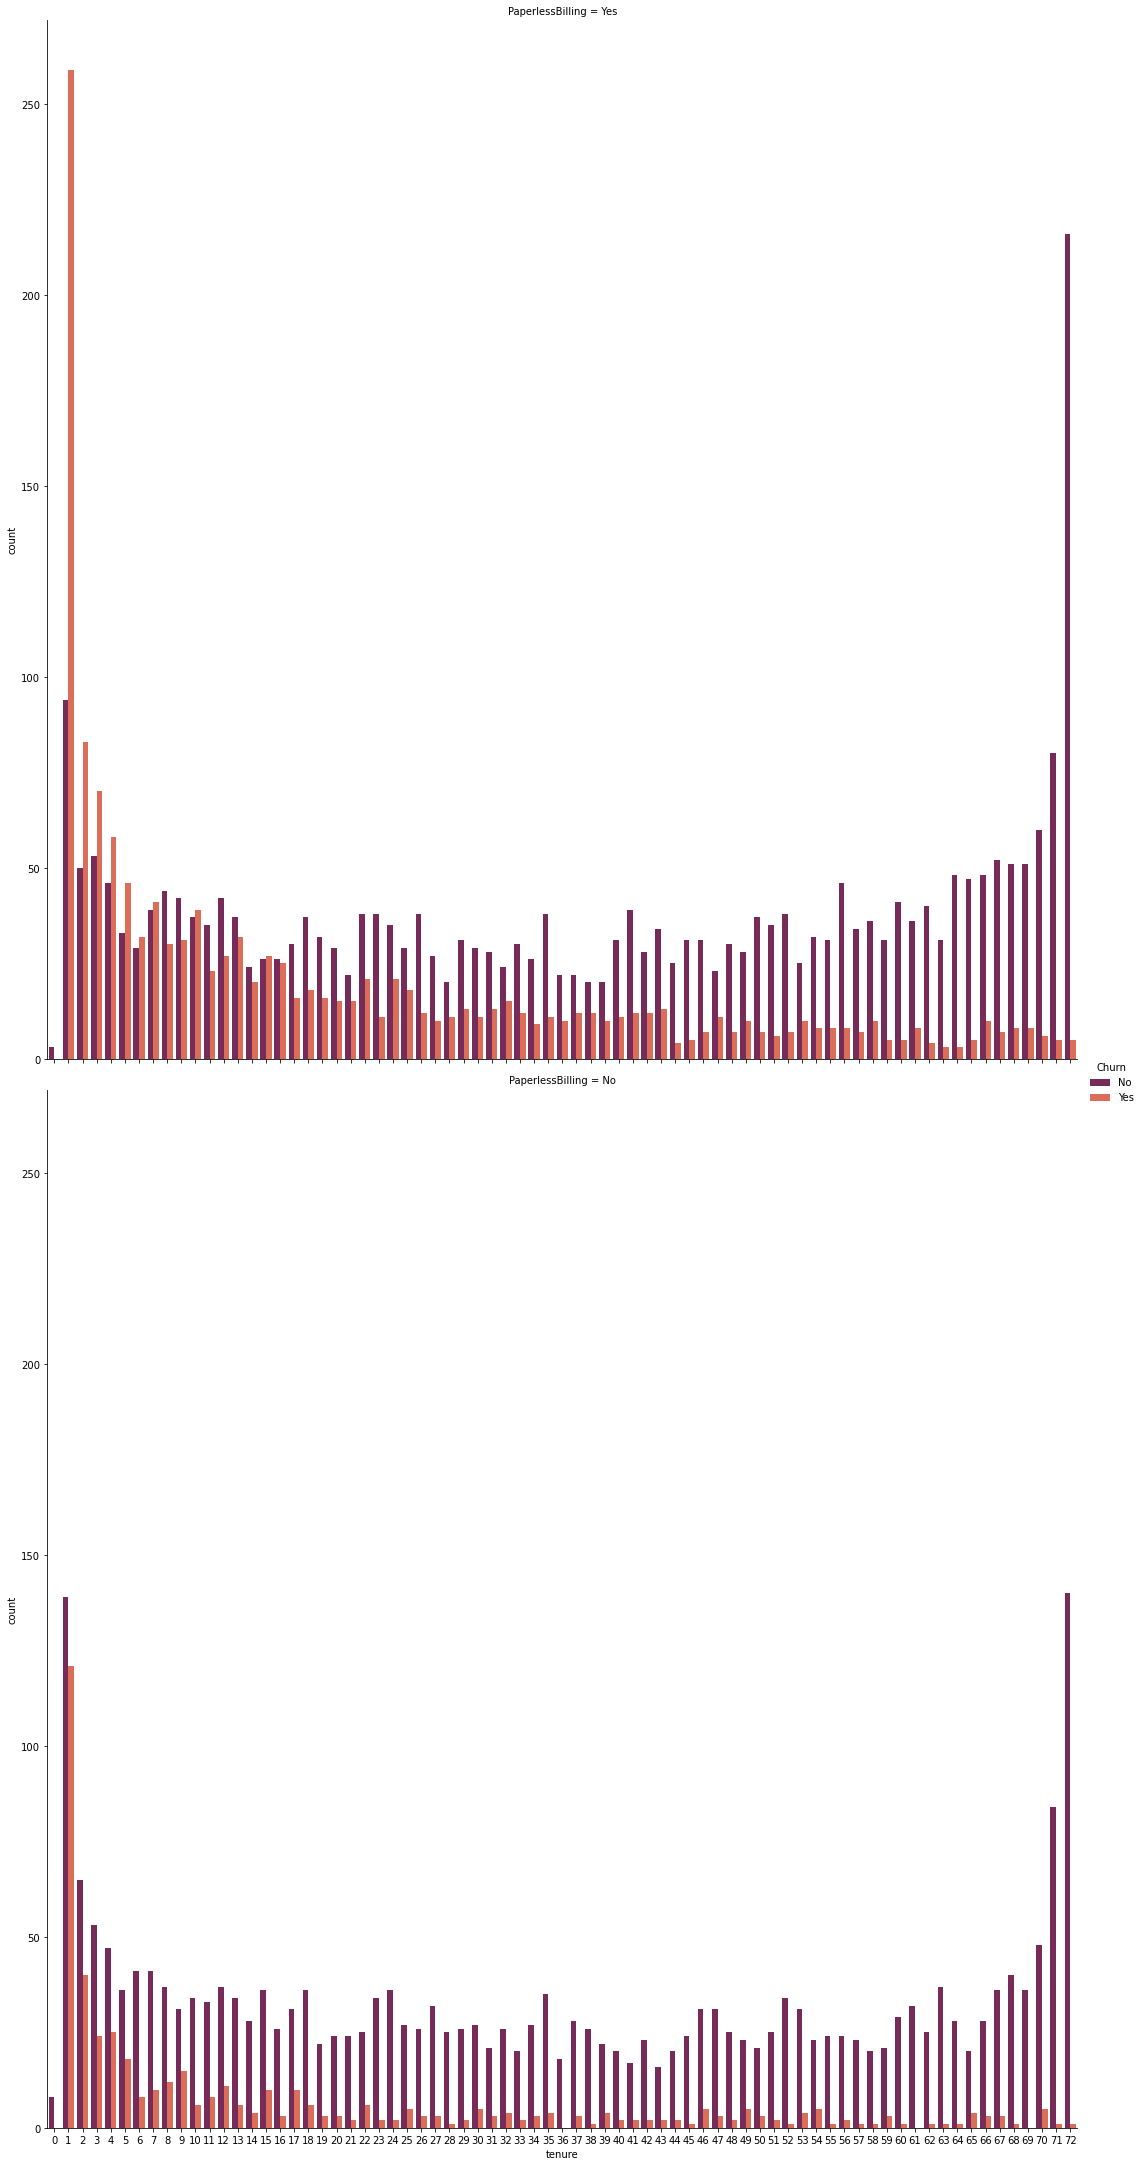

In [32]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='PaperlessBilling', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer with paperless billing have and a shorter tenure have good churn count
- customer without paperless billing and tenure of 1 year has good churn count.

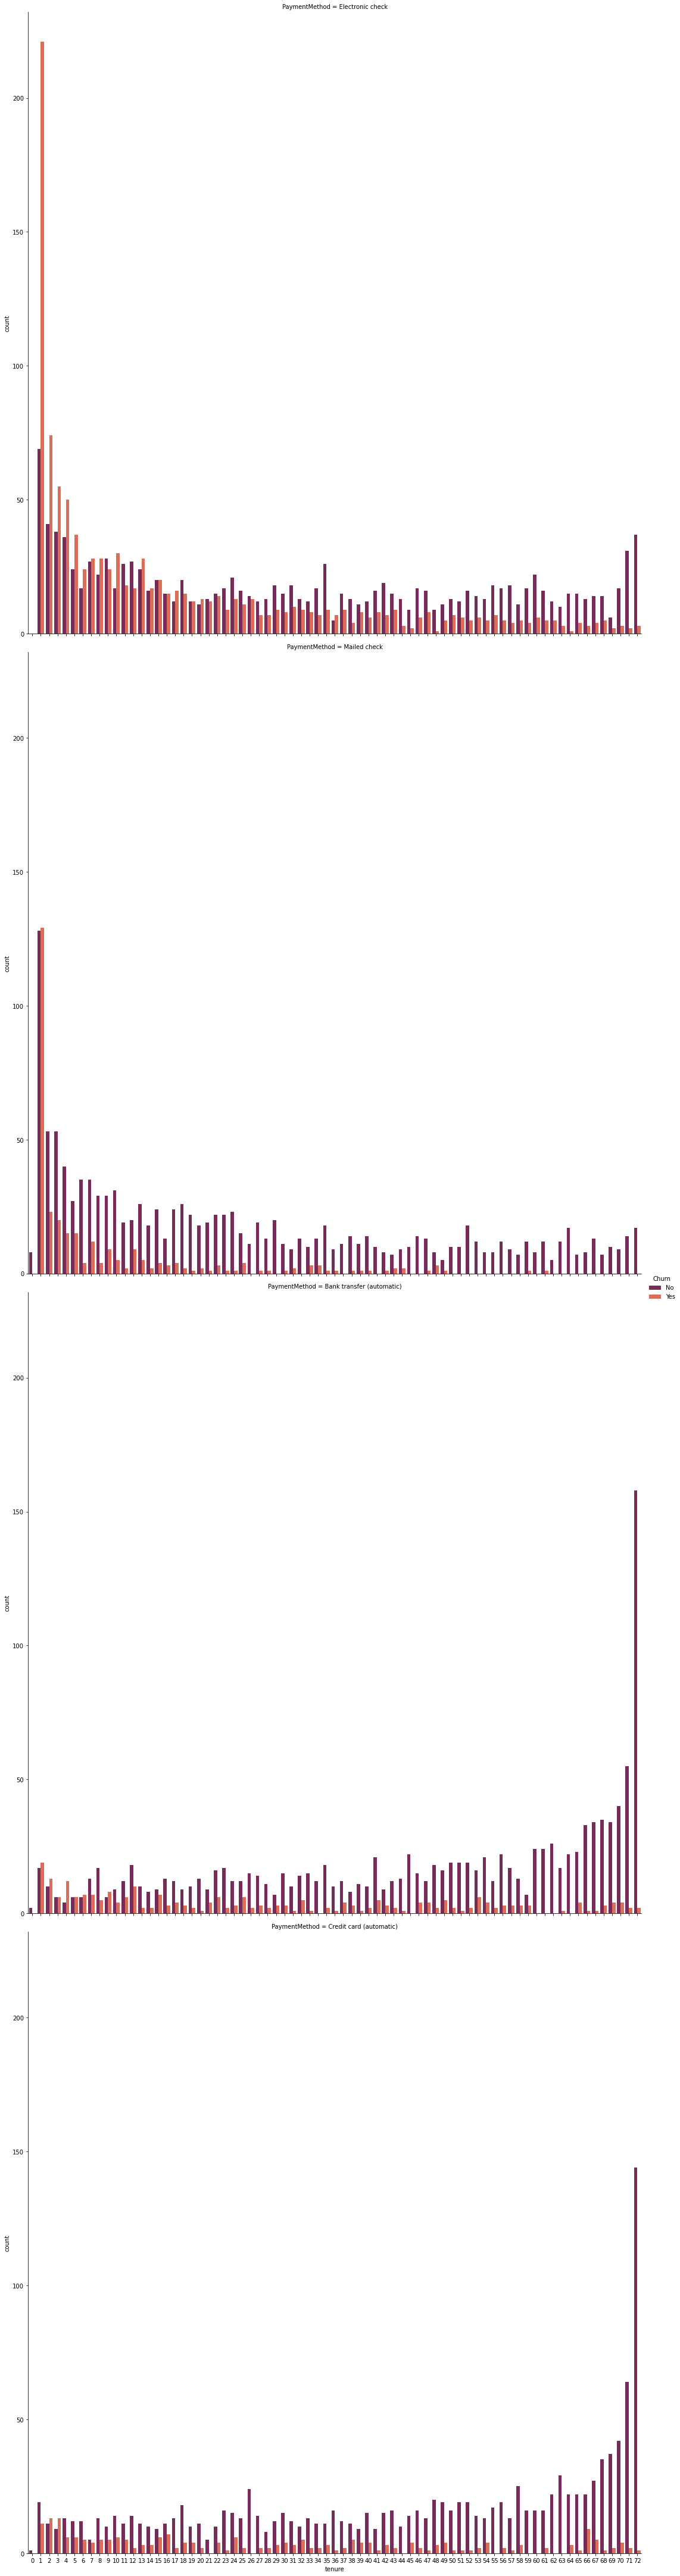

In [33]:
sns.catplot(data=churn,
            x="tenure",
            hue="Churn", 
            col_wrap=1, 
            col='PaymentMethod', 
            palette="rocket", 
            kind="count", 
            height = 15,
            aspect = 1)

- Customer who pay through electronic check have good churn count, but decline has tenure increases
- Customer who pay though mailed check have good churn count for 1 year tenure , the rest decline has tenure increases

In [34]:
#sns.pairplot(churn)

### Apply label encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in obj:
    churn[x]=le.fit_transform(churn[x])

In [36]:
churn.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

### Correlation

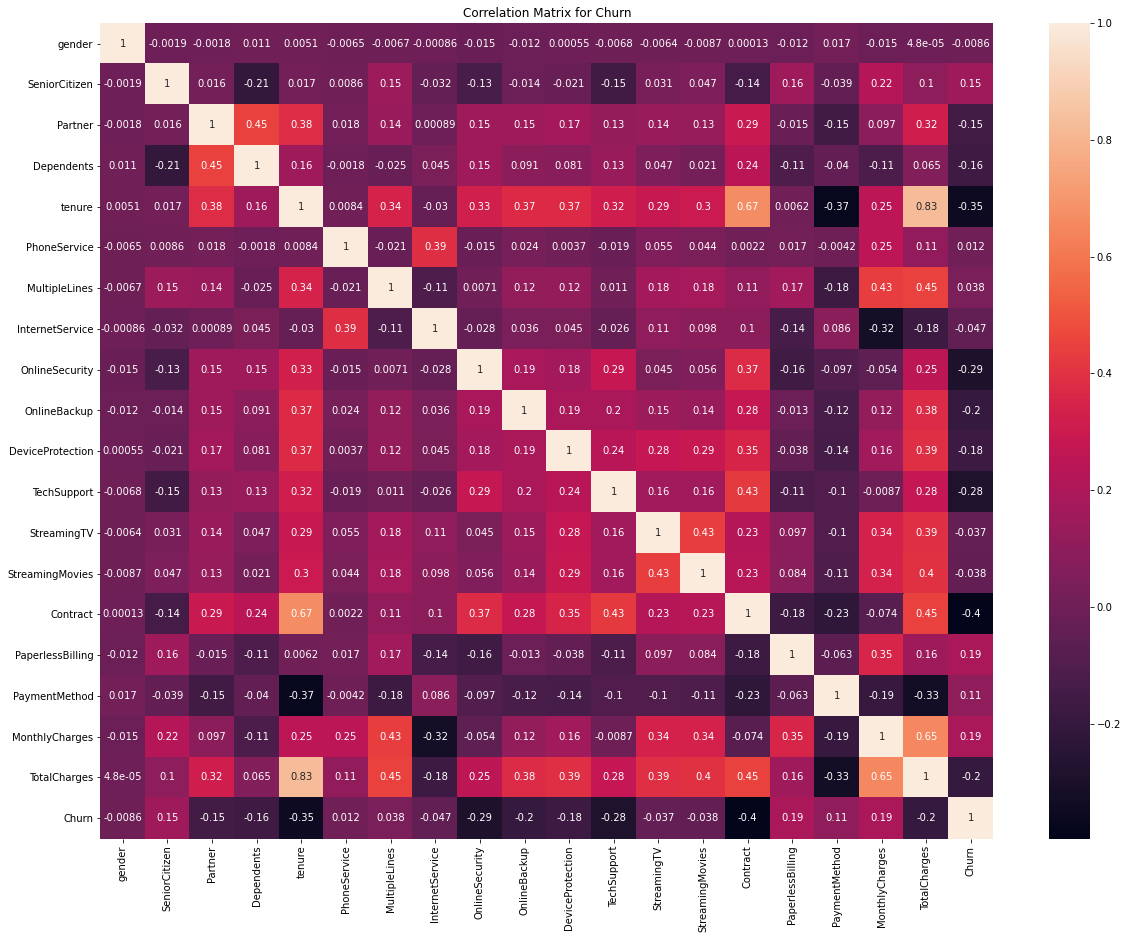

In [37]:
#correlation matrix to find correlation amoung the columns
correlation = churn.corr()
plt.figure(figsize = [20,15])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix for Churn")
plt.show()

### All the variables are in good correlation with churn

In [38]:
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
churn = churn.dropna()

In [40]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


- No null values

### Check for multicollineraity

In [41]:
# import libraries
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#function to find multicollinearity
def find_multicollinearity(data):
    variance = pd.DataFrame()
    data = sma.add_constant(data)
    variance["COLUMN NAME"] = data.columns
    variance["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(variance)


In [43]:
find_multicollinearity(churn)

,COLUMN NAME,VIF
0,const,35.129449
1,gender,1.001903
2,SeniorCitizen,1.152057
3,Partner,1.461176
4,Dependents,1.380561
5,tenure,7.505702
6,PhoneService,1.634125
7,MultipleLines,1.397391
8,InternetService,1.834546
9,OnlineSecurity,1.277858


##### The columns total charges and tenure have multi collinearity, tenure is an important column in churn analysis. and since monthly charges and total charges are in positive relationship, identified throuh the scatter plot. Dropping the totalcharges column

In [44]:
churn = churn.drop("TotalCharges",axis=1)

In [45]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


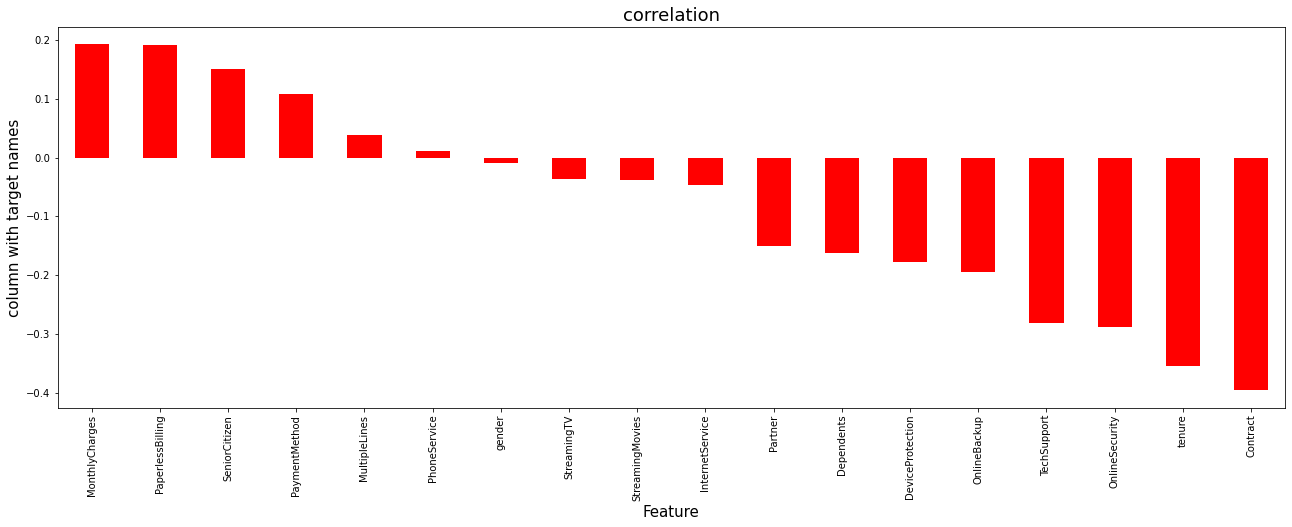

In [46]:
plt.figure(figsize=(22,7))
churn.corr()["Churn"].sort_values(ascending = False).drop(["Churn"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

#### Observtion:
- gender and phone service are poorly correlated with churn 
- Other columns are in with positive or negative correlation with churn

In [47]:
churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


### Observations:
- The difference between mean and standard devistion is normal 
- The difference between max and min range is normal

# Split dependent and independent variables

In [48]:
x = churn.drop("Churn", axis=1)
y = churn["Churn"]

In [49]:
print(x.shape)
print(y.shape)

(7032, 18)
(7032,)


# Check for skewness and removal

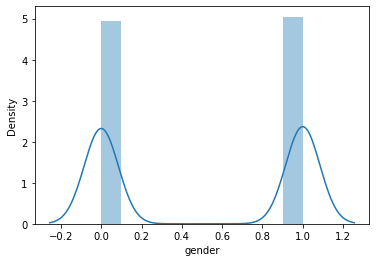

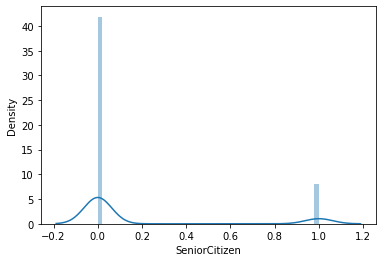

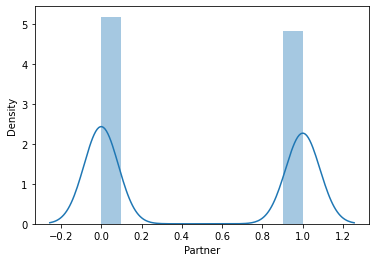

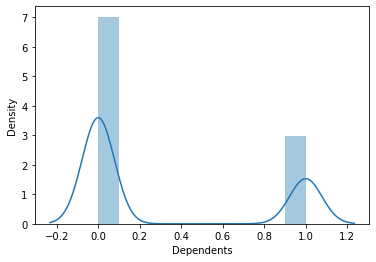

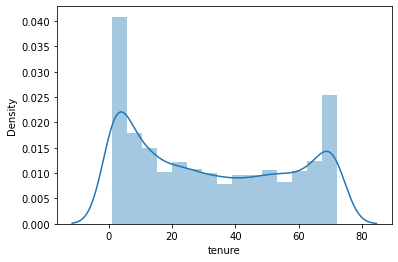

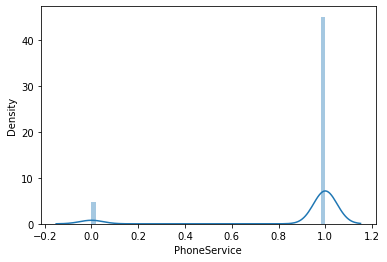

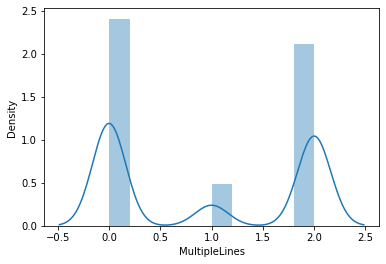

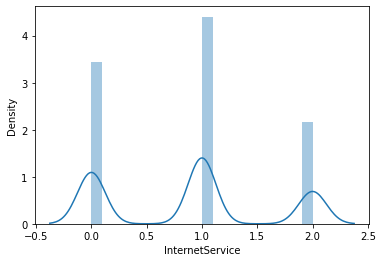

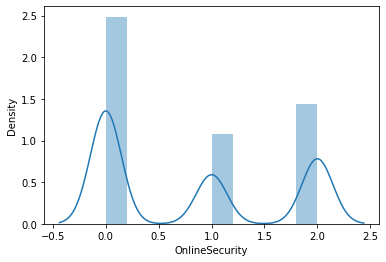

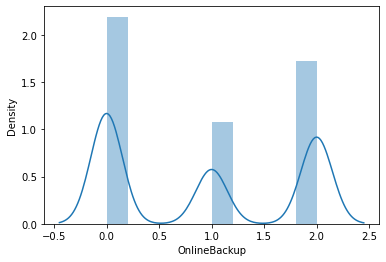

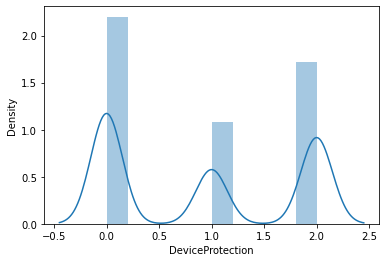

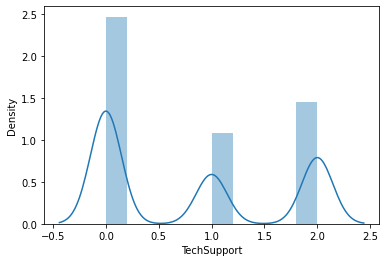

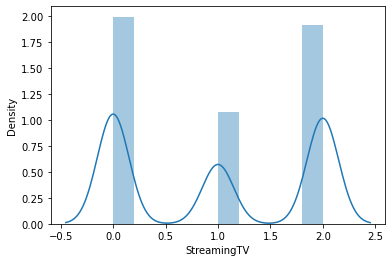

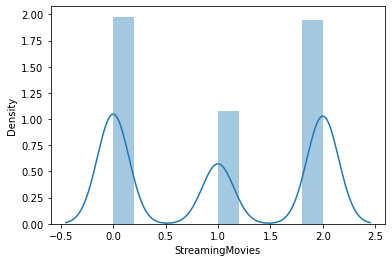

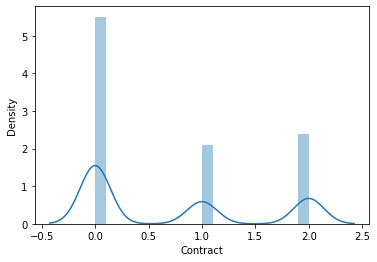

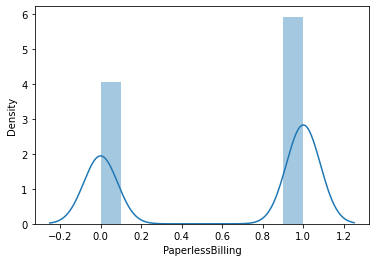

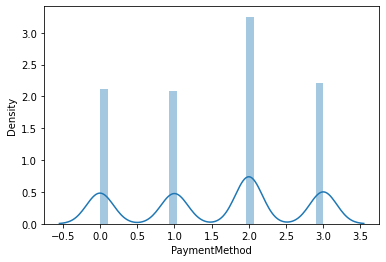

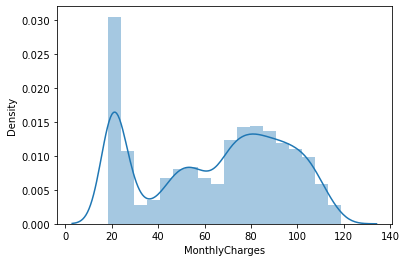

In [50]:
for i in x.columns:
    sns.distplot(x[i], kde=True)
    plt.show()

In [51]:
x.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
dtype: float64

- most of the columns are of categorical type and hence there is no skewness where as the numerica variables are normally distributed

# Check for outlier and removal

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 19 Text major ticklabel objects>)

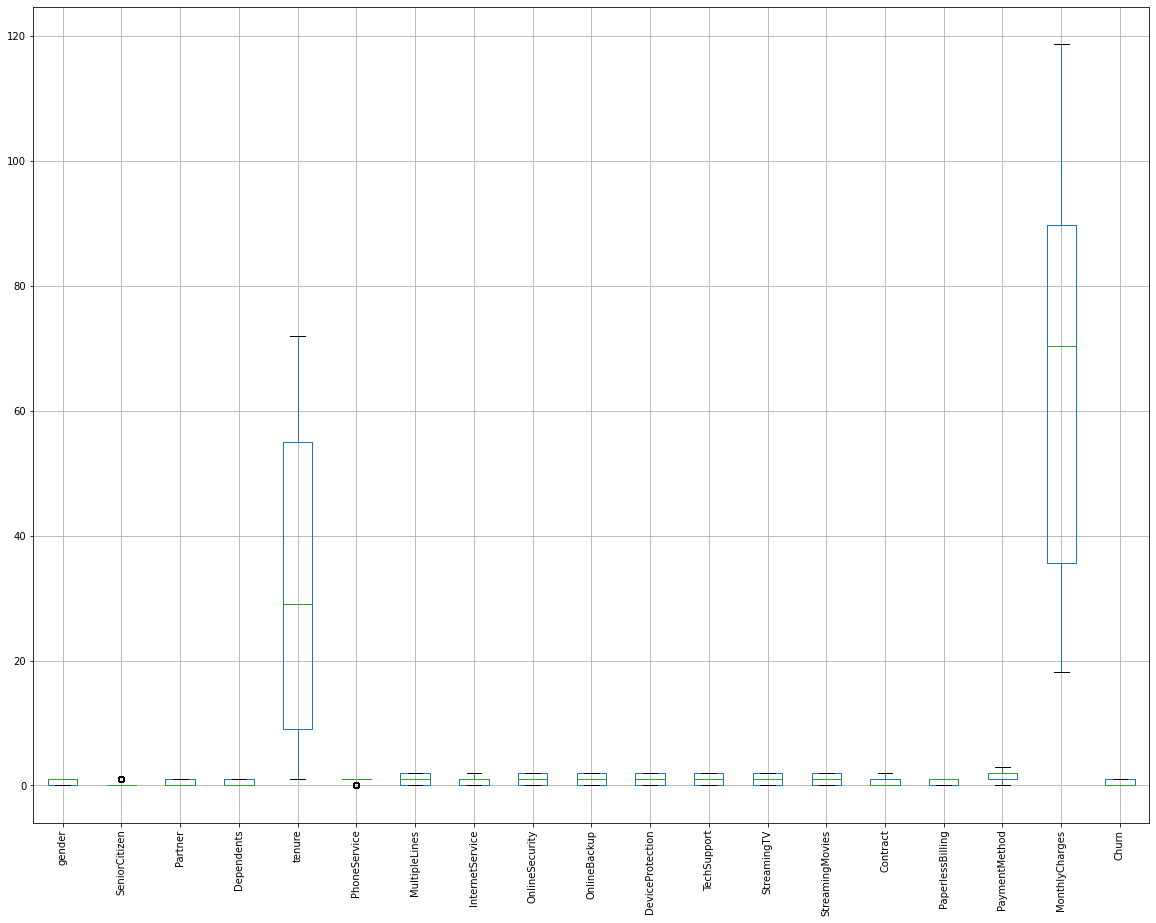

In [52]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
churn.boxplot()
plt.xticks(rotation=90)

##### No otuliers

In [53]:
# scale the data

In [54]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)

# Finding the best random state

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8236966824644549  on Random State  816


# Train/Test split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 816)

In [57]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(2110, 18)
(2110,)
(4922, 18)
(4922,)


# Finding the best algorithm

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
model =[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [60]:
for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of " ,m, " is: ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

Accuracy score of  LogisticRegression()  is: 
0.8236966824644549
[[1433  148]
 [ 224  305]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1581
           1       0.67      0.58      0.62       529

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.82      0.82      0.82      2110



Accuracy score of  GaussianNB()  is: 
0.7549763033175355
[[1188  393]
 [ 124  405]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1581
           1       0.51      0.77      0.61       529

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.77      2110



Accuracy score of  SVC()  is: 
0.8080568720379147
[[1446  135]
 [ 270  259]]
              precision    recall  f1-score   support

           0       0.84      0.91 

In [61]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [62]:
cross_list = [lr,gnb,svc,dt,rf]

from sklearn.model_selection import cross_val_score
for m in cross_list:
    scr = cross_val_score(m, x, y, cv = 7)
    print("the cross validation score of  model :", scr.mean())

the cross validation score of  model : 0.8033288310864574
the cross validation score of  model : 0.7545482604054288
the cross validation score of  model : 0.7956496685610083
the cross validation score of  model : 0.7261065191968444
the cross validation score of  model : 0.7861216116344856


- Lr = 82
- Gnb = 76
- Svc = 81
- Dtc = 73
- Rf = 80

-----
- Cross
- Lr = 80
- Gnb = 76
- Svc = 80
- Dtc=73
- Rf = 79


### Observation:

- The best algorithm is log regression 
- with accuracy score of 82 and cross of 81 
- choosing logestic regression because it is effective for chur analysis

# Hyper parameter tunning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
c_space = np.logspace(-5, 8, 15)
params = {'C': c_space}

In [66]:
log_cv = GridSearchCV(LogisticRegression(), params, cv = 5)

In [67]:
log_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [68]:
log_cv.best_params_

{'C': 0.4393970560760795}

In [69]:
log_cv.best_score_

0.7941898807312946

In [70]:
log_pred = log_cv.best_estimator_.predict(x_test)

In [71]:
accuracy_score(y_test, log_pred)

0.8232227488151659

- The best score is 82% 

# Visuvalizing the logistic regression reg plot and AUCROC curve

In [72]:
import scikitplot as skplt

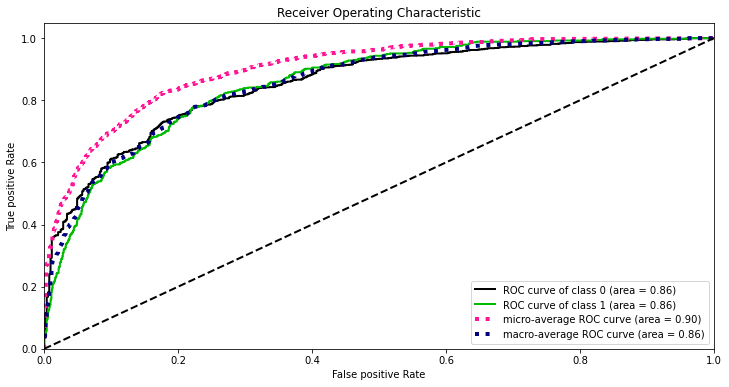

In [73]:
from sklearn.metrics import roc_curve, auc

test_prob = log_cv.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

# Saving the model and Conclusion

In [76]:
import joblib
joblib.dump(log_cv.best_estimator_, "churnprediction.pkl")
joblib.dump(log_cv.best_estimator_, "churnprediction.obj")

['churnprediction.obj']

In [77]:
import numpy as np
a = np.array(y_test)
predicted = np.array(log_pred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con.head()

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
